In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and hypothesis testing
from scipy import stats

# Date and time manipulation
import datetime as dt

# Feature engineering and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Model evaluation and metrics
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
og = pd.read_csv('Capstone scaler/price_optimsation_dataset.csv')

In [3]:
df = og.copy()

In [4]:
df.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0          15.10       45.95                   39                         161   
1          12.93       45.95                   39                         161   
2          14.84       45.95                   39                         161   
3          14.29       45.95                   39                         161   
4          15.10       45.95                   39                         161   

   product_photos_qty  product_weight_g  product_score  customers  weekday  \
0                   2               350           4.00         57       23   
1                   2               350           4.00         61       22   
2                   2               350           4.00        123       21   
3                   2               350           4.00         90       23   
4                   2               350           4.00         54       21   

   weekend  holiday  month  year     s  volume  comp_1  ps1   fp1  comp_2  \
0        8        1      5  2017 10.27    3800   89.90 3.90 15.01  215.00   
1        8        1      6  2017  6.50    3800   89.90 3.90 14.77  209.00   
2       10        1      7  2017 12.07    3800   89.90 3.90 13.99  205.00   
3        8        1      8  2017  9.29    3800   89.90 3.90 14.66  199.51   
4        9        1      9  2017  5.56    3800   89.90 3.90 18.78  163.40   

   ps2   fp2  comp_3  ps3   fp3  lag_price  
0 4.40  8.76   45.95 4.00 15.10      45.90  
1 4.40 21.32   45.95 4.00 12.93      45.95  
2 4.40 22.20   45.95 4.00 14.84      45.95  
3 4.40 19.41   45.95 4.00 14.29      45.95  
4 4.40 24.32   45.95 4.00 15.10      45.95

In [5]:
df.shape

(676, 30)

In [6]:
df.describe().T

count     mean     std     min     25%     50%  \
qty                        676.00    14.50   15.44    1.00    4.00   10.00   
total_price                676.00  1422.71 1700.12   19.90  333.70  807.89   
freight_price              676.00    20.68   10.08    0.00   14.76   17.52   
unit_price                 676.00   106.50   76.18   19.90   53.90   89.90   
product_name_lenght        676.00    48.72    9.42   29.00   40.00   51.00   
product_description_lenght 676.00   767.40  655.21  100.00  339.00  501.00   
product_photos_qty         676.00     1.99    1.42    1.00    1.00    1.50   
product_weight_g           676.00  1847.50 2274.81  100.00  348.00  950.00   
product_score              676.00     4.09    0.23    3.30    3.90    4.10   
customers                  676.00    81.03   62.06    1.00   34.00   62.00   
weekday                    676.00    21.77    0.99   20.00   21.00   22.00   
weekend                    676.00     8.66    0.71    8.00    8.00    9.00   
holiday                    676.00     1.49    0.94    0.00    1.00    1.00   
month                      676.00     6.19    3.24    1.00    3.00    6.00   
year                       676.00  2017.53    0.50 2017.00 2017.00 2018.00   
s                          676.00    14.64   11.93    0.48    7.51   11.32   
volume                     676.00 10664.63 9172.80  640.00 3510.00 8000.00   
comp_1                     676.00    79.45   47.93   19.90   49.91   69.90   
ps1                        676.00     4.16    0.12    3.70    4.10    4.20   
fp1                        676.00    18.60    9.41    0.10   13.83   16.62   
comp_2                     676.00    92.93   49.48   19.90   53.90   89.99   
ps2                        676.00     4.12    0.21    3.30    4.10    4.20   
fp2                        676.00    18.62    6.42    4.41   14.48   16.81   
comp_3                     676.00    84.18   47.75   19.90   53.79   59.90   
ps3                        676.00     4.00    0.23    3.50    3.90    4.00   
fp3                        676.00    17.97    5.53    7.67   15.04   16.52   
lag_price                  676.00   107.40   76.97   19.85   55.67   89.90   

                                75%      max  
qty                           18.00   122.00  
total_price                 1887.32 12095.00  
freight_price                 22.71    79.76  
unit_price                   129.99   364.00  
product_name_lenght           57.00    60.00  
product_description_lenght   903.00  3006.00  
product_photos_qty             2.00     8.00  
product_weight_g            1850.00  9750.00  
product_score                  4.20     4.50  
customers                    116.00   339.00  
weekday                       23.00    23.00  
weekend                        9.00    10.00  
holiday                        2.00     4.00  
month                          8.00    12.00  
year                        2018.00  2018.00  
s                             17.75   100.00  
volume                     15750.00 32736.00  
comp_1                       104.26   349.90  
ps1                            4.20     4.50  
fp1                           19.73    57.23  
comp_2                       117.89   349.90  
ps2                            4.20     4.40  
fp2                           21.67    57.23  
comp_3                        99.99   255.61  
ps3                            4.10     4.40  
fp3                           19.45    57.23  
lag_price                    129.99   364.00

In [7]:
print("\nUnique product categories:", df['product_category_name'].nunique())
print("Unique products:", df['product_id'].nunique())
print("\nMissing values count:\n", df.isnull().sum())



Unique product categories: 9
Unique products: 52

Missing values count:
 product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           

In [8]:
print("\nSample of 'month_year' column:\n", df['month_year'].sample(5))


Sample of 'month_year' column:
 443    01-07-2017
382    01-11-2017
152    01-01-2018
635    01-04-2017
27     01-02-2018
Name: month_year, dtype: object


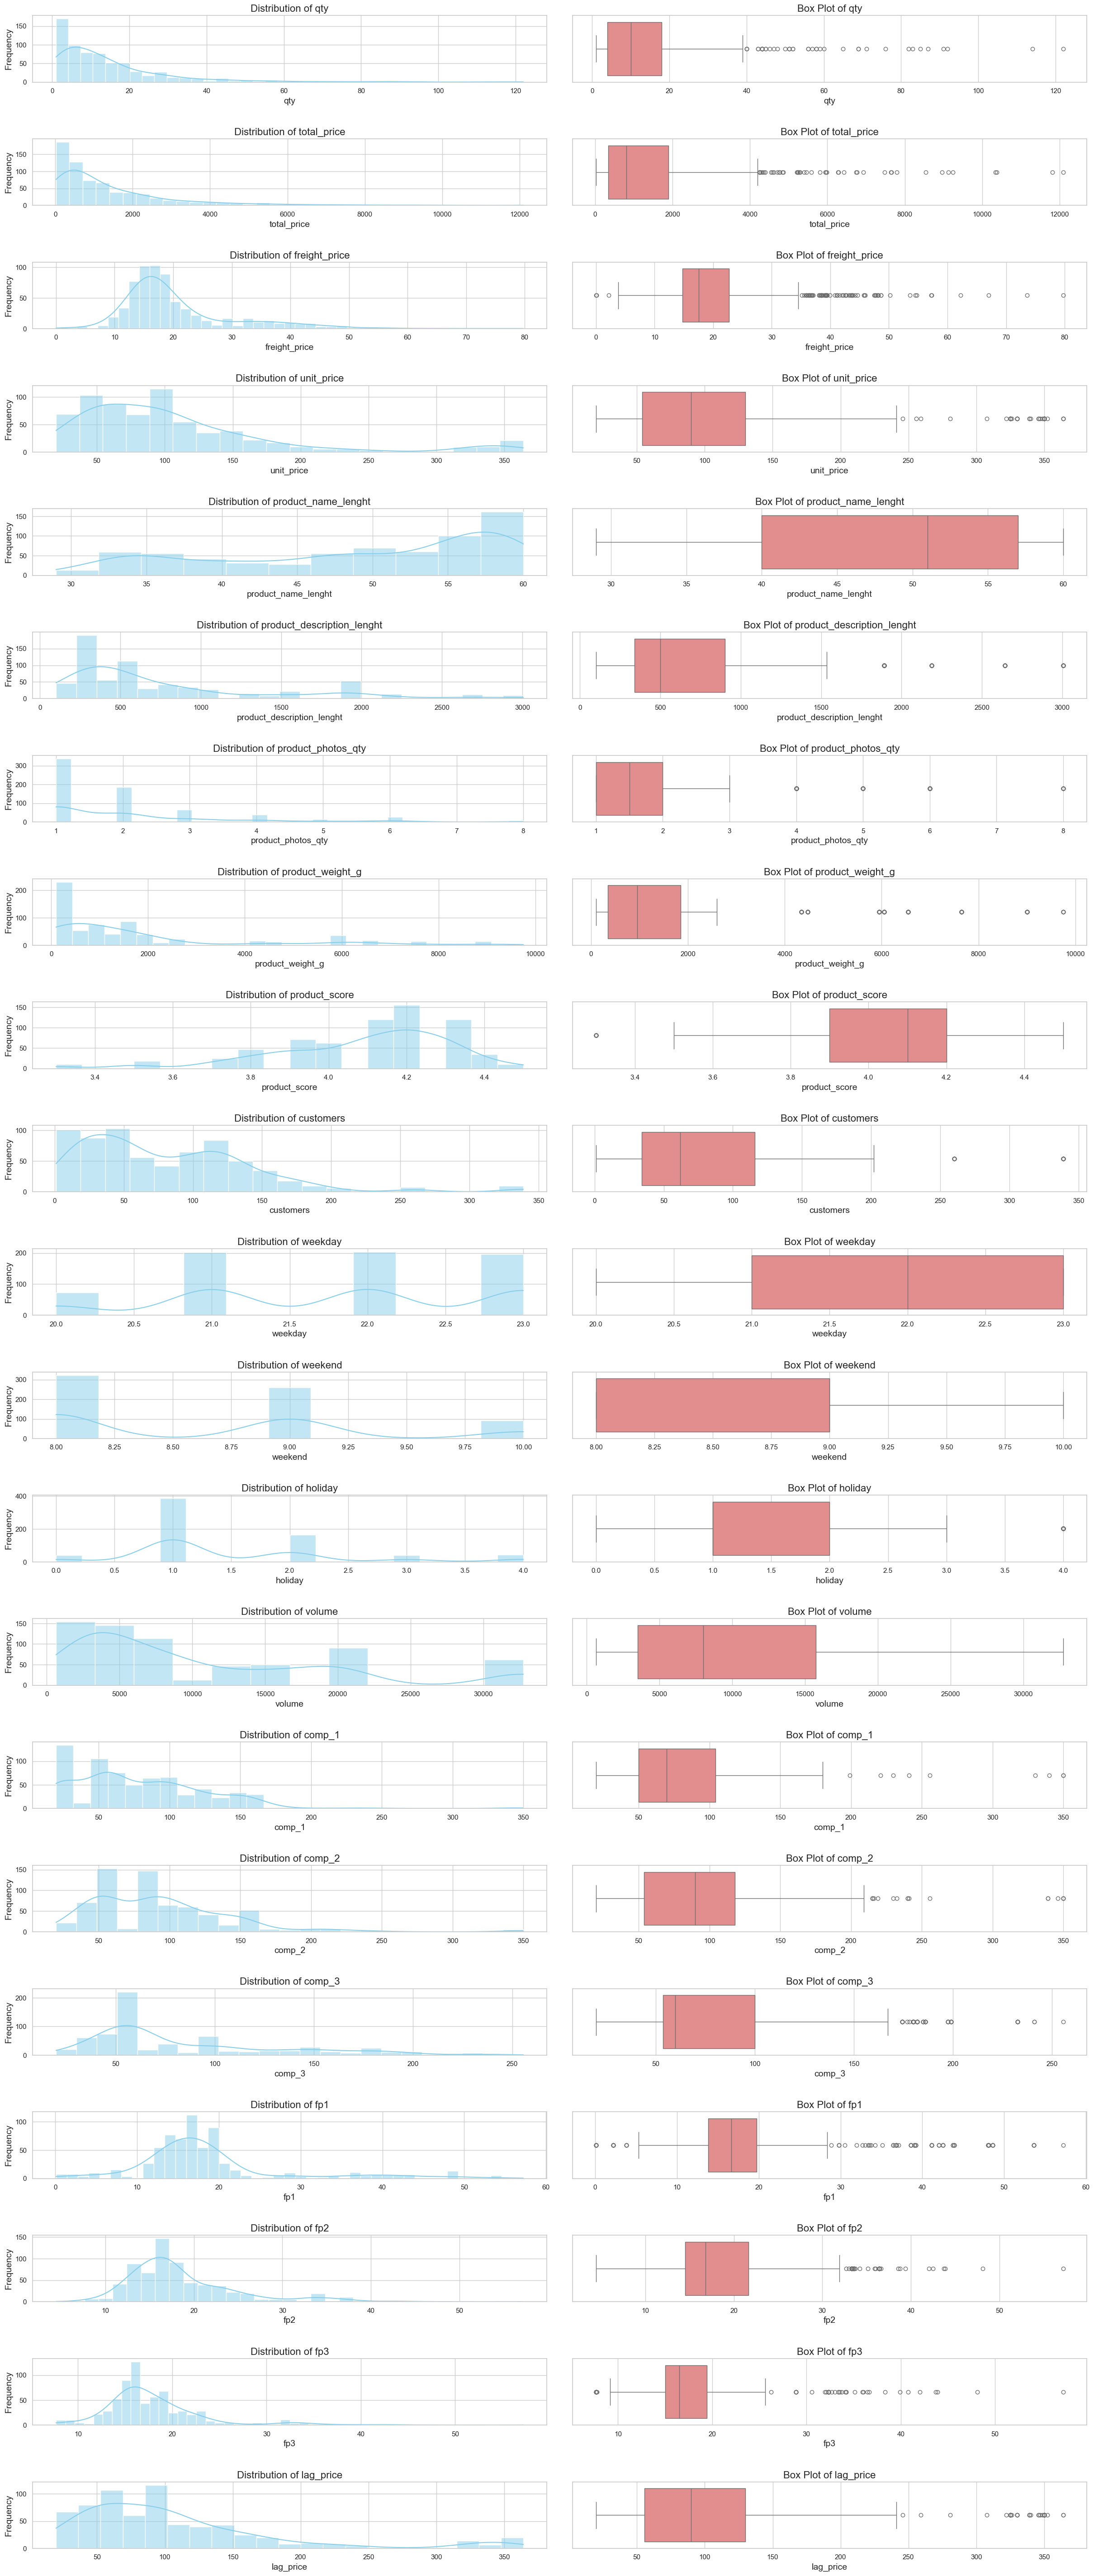

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better visibility
plt.figure(figsize=(25, 60))

# Number of numerical columns
numerical_columns = [
    'qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
    'product_score', 'customers', 'weekday', 'weekend', 'holiday',
    'volume', 'comp_1', 'comp_2', 'comp_3', 'fp1', 'fp2', 'fp3', 'lag_price'
]

# Define number of rows and columns for subplots
n_cols = 2
n_rows = (len(numerical_columns) * 2) // n_cols + 1

# Plot each feature
for i, col in enumerate(numerical_columns):
    # Histogram with KDE
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Box Plot
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)

# Adjust layout for readability
plt.tight_layout(pad=3.0)
plt.show()


In [10]:
import pandas as pd

# Define numerical columns
numerical_columns = [
    'qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
    'product_score', 'customers', 'weekday', 'weekend', 'holiday',
    'volume', 'comp_1', 'comp_2', 'comp_3', 'fp1', 'fp2', 'fp3', 'lag_price'
]

# Initialize a DataFrame to store statistics
summary_stats = pd.DataFrame(index=numerical_columns)

# Calculate descriptive statistics
summary_stats['Mean'] = df[numerical_columns].mean()
summary_stats['Median'] = df[numerical_columns].median()
summary_stats['Std Dev'] = df[numerical_columns].std()
summary_stats['Min'] = df[numerical_columns].min()
summary_stats['Max'] = df[numerical_columns].max()
summary_stats['Skewness'] = df[numerical_columns].skew()
summary_stats['Kurtosis'] = df[numerical_columns].kurtosis()

# Calculate IQR and identify outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers based on IQR method
outliers_low = (df[numerical_columns] < (Q1 - 1.5 * IQR)).sum()
outliers_high = (df[numerical_columns] > (Q3 + 1.5 * IQR)).sum()
summary_stats['Outliers (Low)'] = outliers_low
summary_stats['Outliers (High)'] = outliers_high
summary_stats['Total Outliers'] = outliers_low + outliers_high

# Display the summary statistics
summary_stats = summary_stats.sort_values(by='Skewness', ascending=False)
print(summary_stats)


                               Mean  Median  Std Dev    Min      Max  \
qty                           14.50   10.00    15.44   1.00   122.00   
total_price                 1422.71  807.89  1700.12  19.90 12095.00   
fp3                           17.97   16.52     5.53   7.67    57.23   
product_photos_qty             1.99    1.50     1.42   1.00     8.00   
freight_price                 20.68   17.52    10.08   0.00    79.76   
product_weight_g            1847.50  950.00  2274.81 100.00  9750.00   
unit_price                   106.50   89.90    76.18  19.90   364.00   
lag_price                    107.40   89.90    76.97  19.85   364.00   
fp2                           18.62   16.81     6.42   4.41    57.23   
fp1                           18.60   16.62     9.41   0.10    57.23   
comp_2                        92.93   89.99    49.48  19.90   349.90   
product_description_lenght   767.40  501.00   655.21 100.00  3006.00   
customers                     81.03   62.00    62.06   1.00   33

In [11]:
import numpy as np

# Log transform highly skewed features
skewed_features = summary_stats[summary_stats['Skewness'] > 2].index
for col in skewed_features:
    df[col] = np.log1p(df[col])

# Capping outliers using the IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Check the skewness after transformations
transformed_skewness = df[numerical_columns].skew()
print(transformed_skewness)


qty                          -0.01
total_price                  -0.25
freight_price                 0.83
unit_price                    1.00
product_name_lenght          -0.53
product_description_lenght    1.01
product_photos_qty            0.74
product_weight_g              1.02
product_score                -0.84
customers                     0.76
weekday                      -0.21
weekend                       0.59
holiday                       0.88
volume                        1.16
comp_1                        0.49
comp_2                        0.76
comp_3                        0.89
fp1                           0.35
fp2                           1.03
fp3                           0.20
lag_price                     0.95
dtype: float64


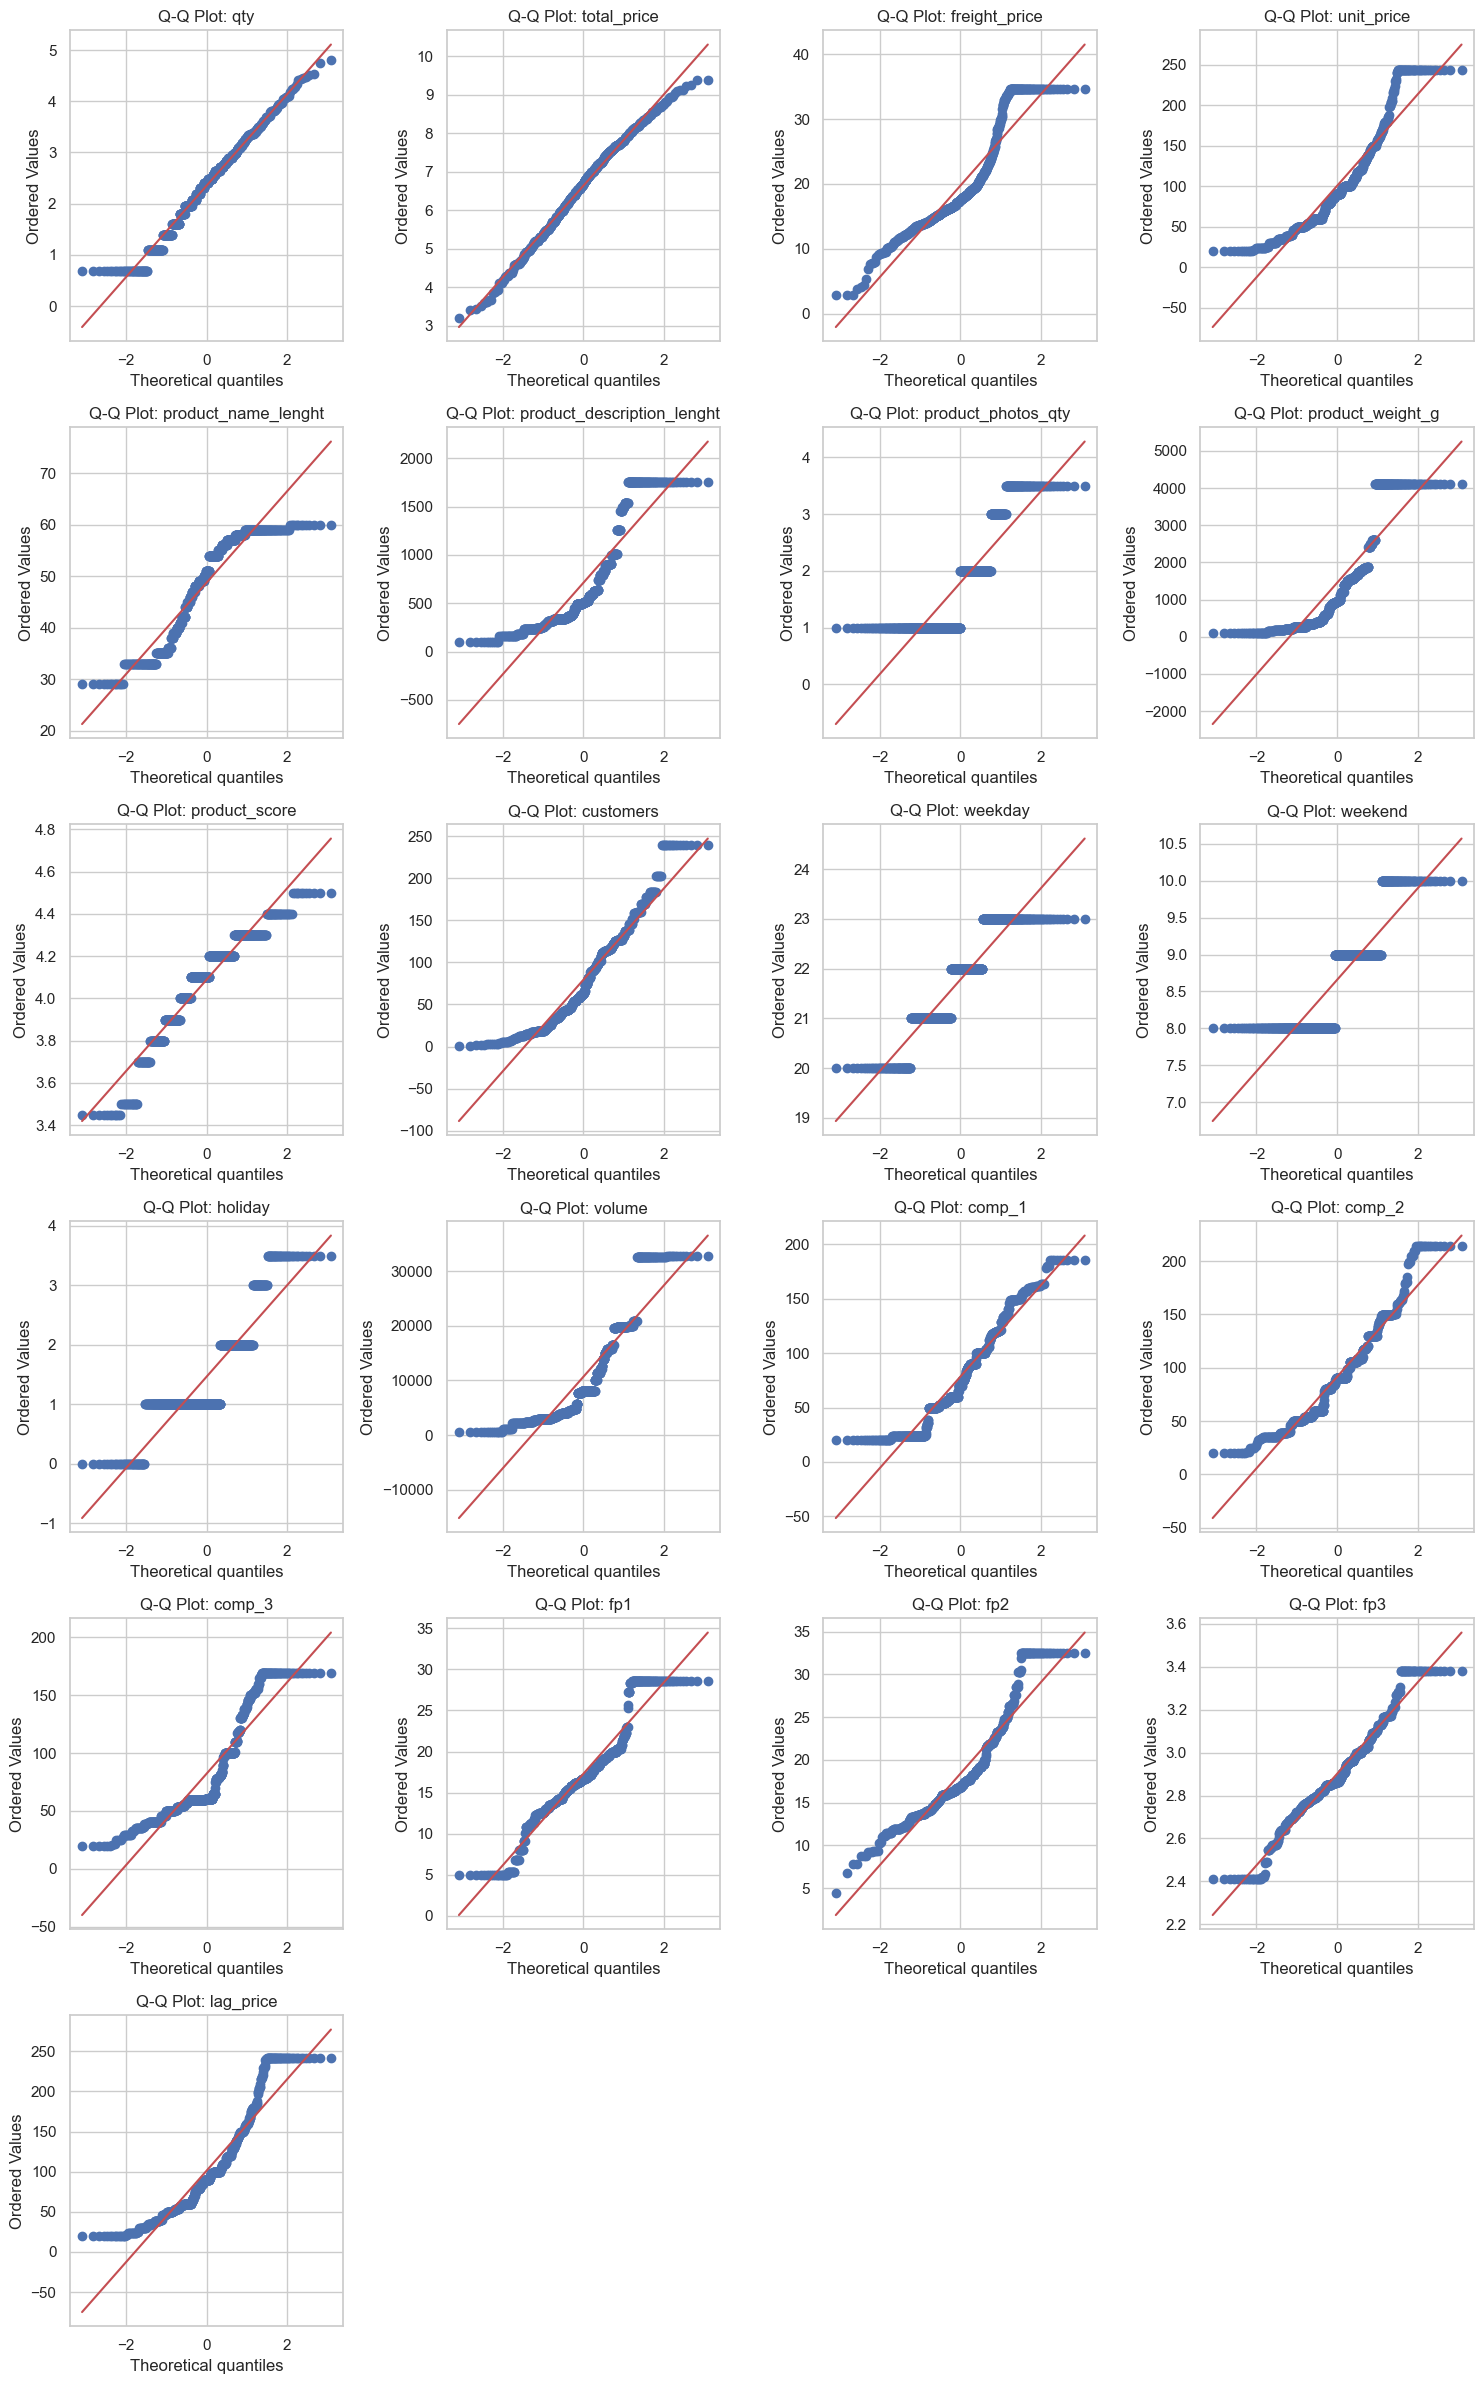

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the list of columns to plot Q-Q plots for
columns_to_plot = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score',
                   'customers', 'weekday', 'weekend', 'holiday', 'volume', 'comp_1', 'comp_2', 'comp_3', 
                   'fp1', 'fp2', 'fp3', 'lag_price']

# Set up the plotting grid with 6 rows and 4 columns
plt.figure(figsize=(15, 24))

# Loop through each column and create Q-Q plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 4, i)  # 6 rows, 4 columns for a grid of 24 plots
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {column}')
    
plt.tight_layout()
plt.show()


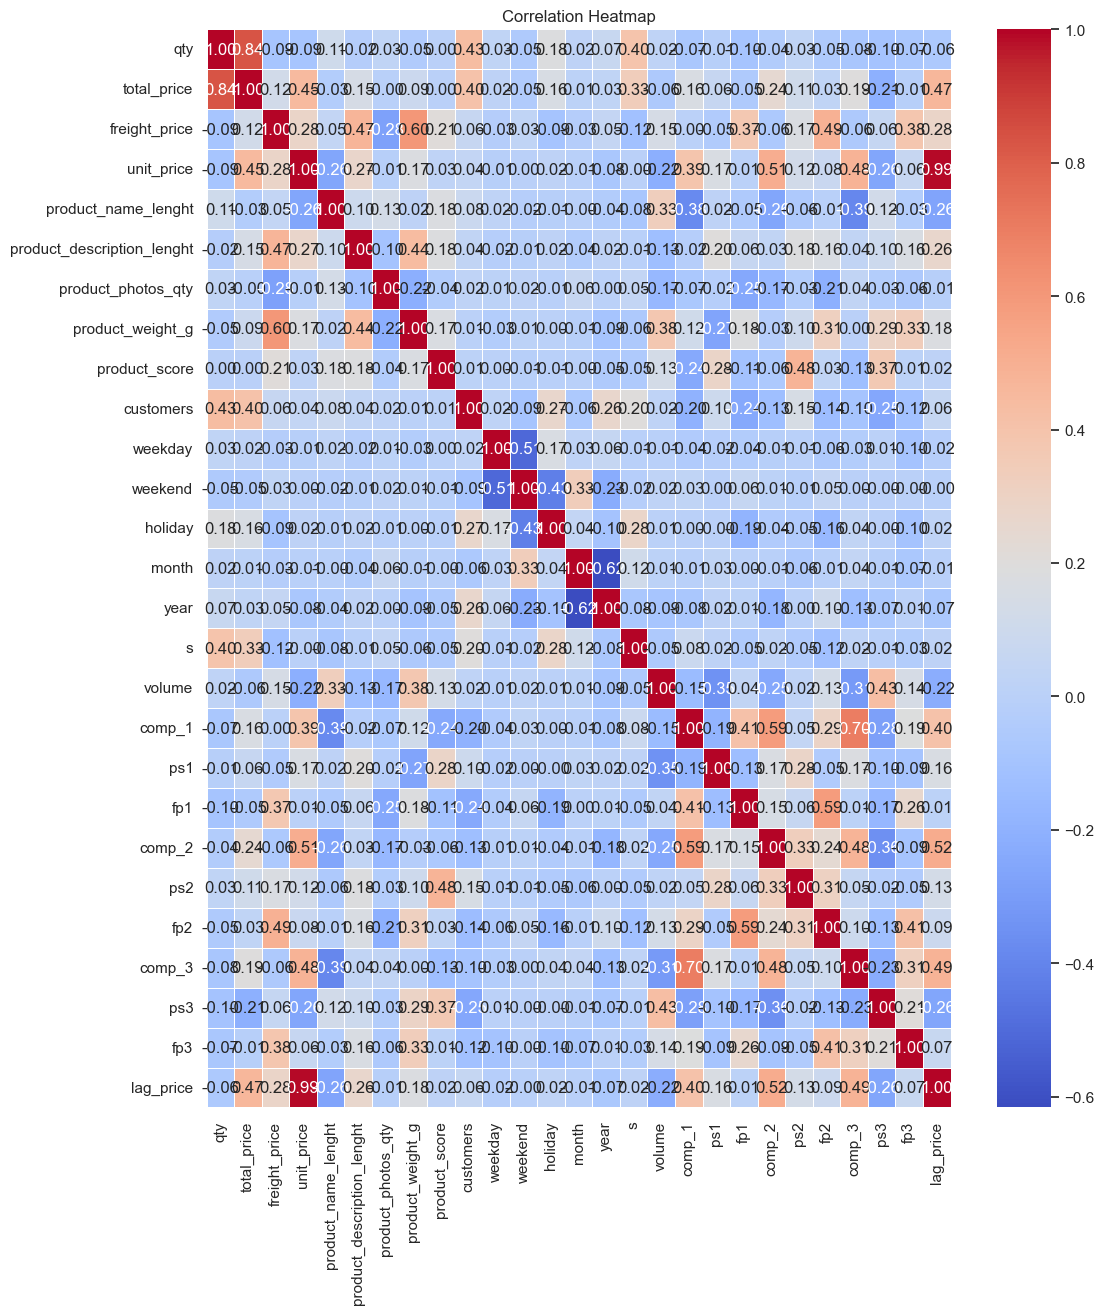

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [14]:
print(correlation_matrix)

                             qty  total_price  freight_price  unit_price  \
qty                         1.00         0.84          -0.09       -0.09   
total_price                 0.84         1.00           0.12        0.45   
freight_price              -0.09         0.12           1.00        0.28   
unit_price                 -0.09         0.45           0.28        1.00   
product_name_lenght         0.11        -0.03           0.05       -0.26   
product_description_lenght -0.02         0.15           0.47        0.27   
product_photos_qty          0.03        -0.00          -0.28       -0.01   
product_weight_g           -0.05         0.09           0.60        0.17   
product_score               0.00         0.00           0.21        0.03   
customers                   0.43         0.40           0.06        0.04   
weekday                     0.03         0.02          -0.03       -0.01   
weekend                    -0.05        -0.05           0.03        0.00   
holiday     

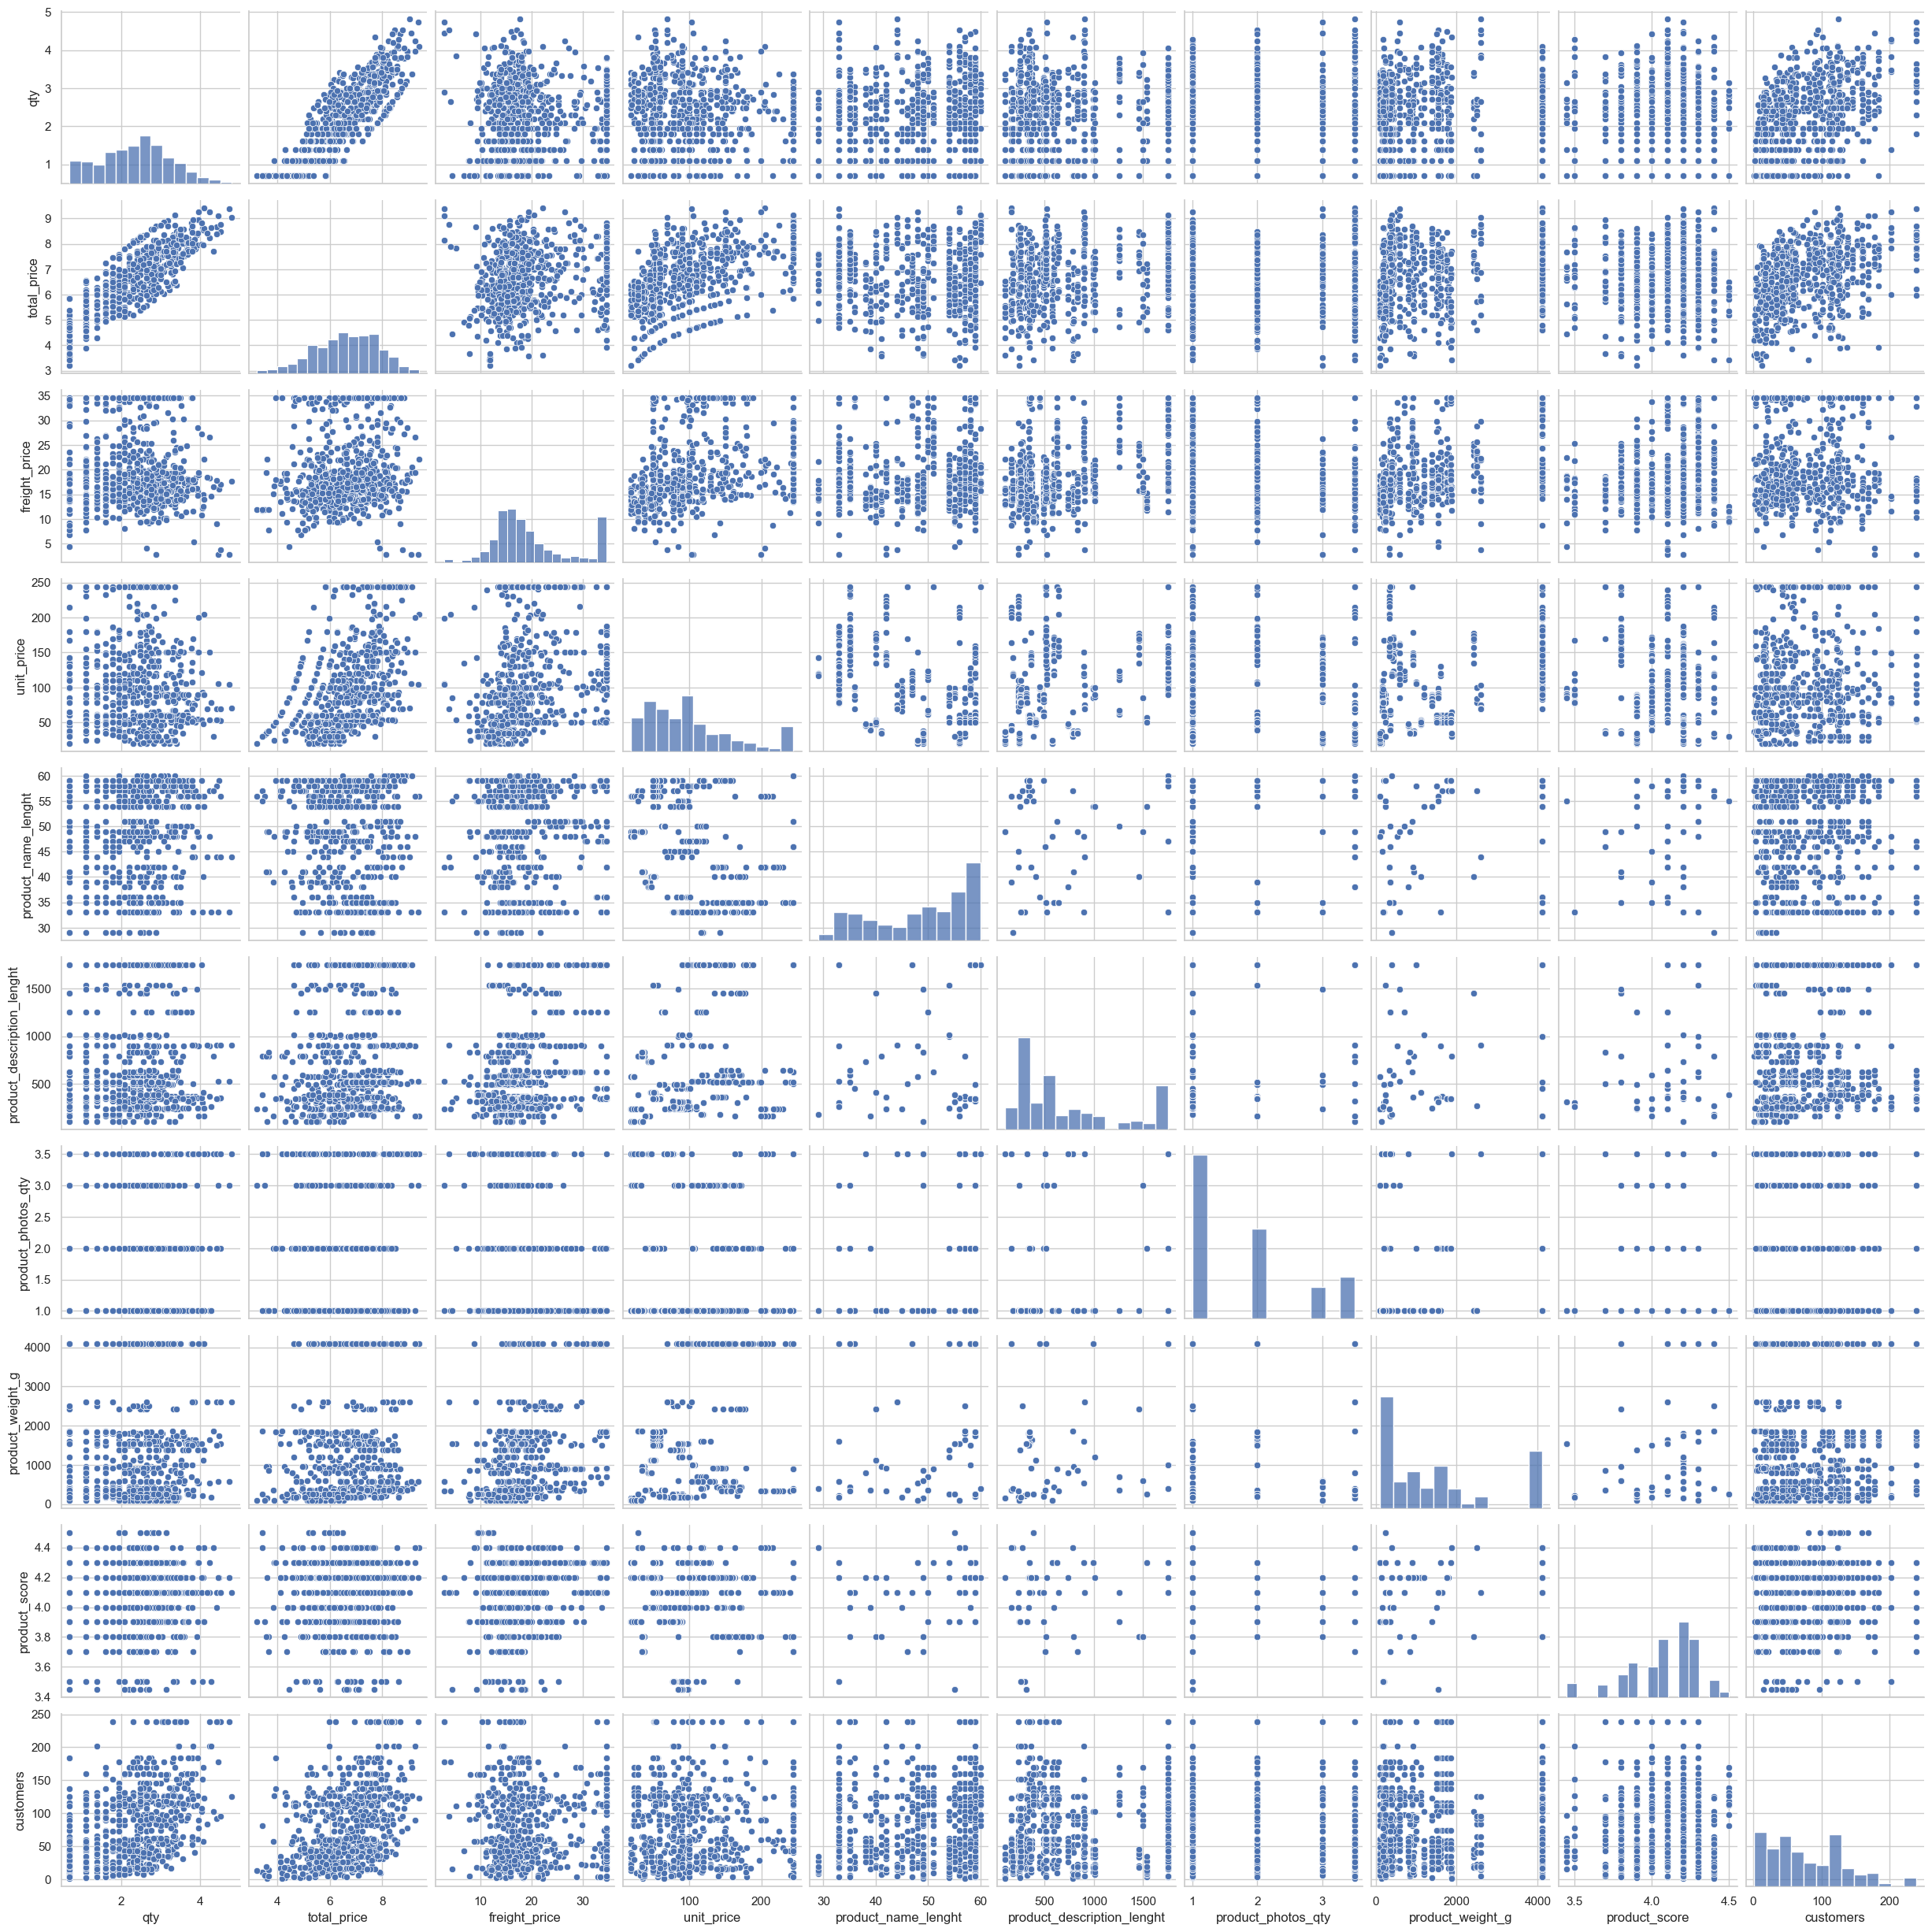

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for pairplot
numeric_columns = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_score', 'customers']

# Create pairplot
sns.pairplot(df[numeric_columns])
plt.show()


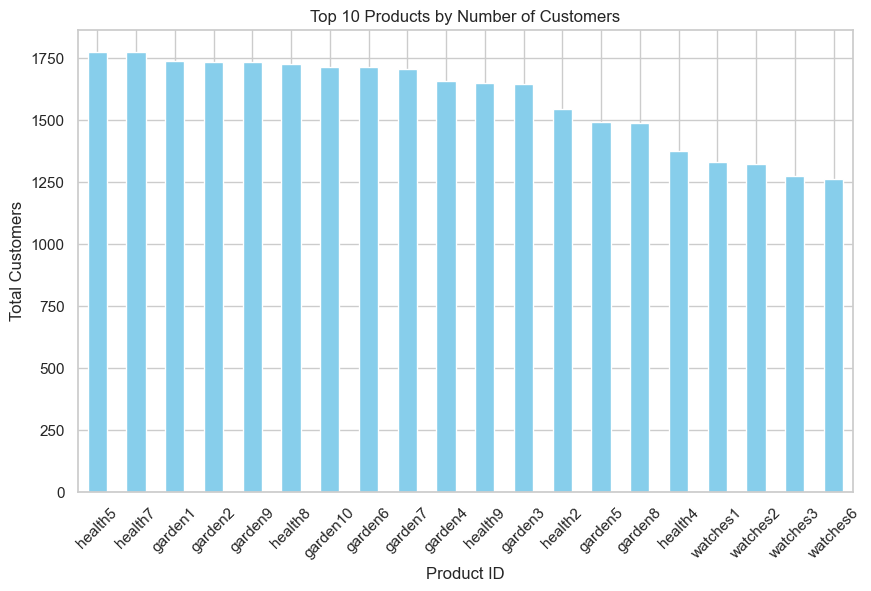

In [16]:
# Group by product_id and sum the 'customers' column
top_10_products = df.groupby('product_id')['customers'].sum().sort_values(ascending=False).head(20)

# Create a bar plot for the top 10 products
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Number of Customers')
plt.xlabel('Product ID')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)
plt.show()


In [17]:
df.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017 0.69         3.85   
1       bed1        bed_bath_table  01-06-2017 1.39         4.93   
2       bed1        bed_bath_table  01-07-2017 1.95         5.62   
3       bed1        bed_bath_table  01-08-2017 1.61         5.22   
4       bed1        bed_bath_table  01-09-2017 1.10         4.53   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0          15.10       45.95                39.00                      161.00   
1          12.93       45.95                39.00                      161.00   
2          14.84       45.95                39.00                      161.00   
3          14.29       45.95                39.00                      161.00   
4          15.10       45.95                39.00                      161.00   

   product_photos_qty  product_weight_g  product_score  customers  weekday  \
0                2.00            350.00           4.00      57.00    23.00   
1                2.00            350.00           4.00      61.00    22.00   
2                2.00            350.00           4.00     123.00    21.00   
3                2.00            350.00           4.00      90.00    23.00   
4                2.00            350.00           4.00      54.00    21.00   

   weekend  holiday  month  year     s  volume  comp_1  ps1   fp1  comp_2  \
0     8.00     1.00      5  2017 10.27 3800.00   89.90 3.90 15.01  213.87   
1     8.00     1.00      6  2017  6.50 3800.00   89.90 3.90 14.77  209.00   
2    10.00     1.00      7  2017 12.07 3800.00   89.90 3.90 13.99  205.00   
3     8.00     1.00      8  2017  9.29 3800.00   89.90 3.90 14.66  199.51   
4     9.00     1.00      9  2017  5.56 3800.00   89.90 3.90 18.78  163.40   

   ps2   fp2  comp_3  ps3  fp3  lag_price  
0 4.40  8.76   45.95 4.00 2.78      45.90  
1 4.40 21.32   45.95 4.00 2.63      45.95  
2 4.40 22.20   45.95 4.00 2.76      45.95  
3 4.40 19.41   45.95 4.00 2.73      45.95  
4 4.40 24.32   45.95 4.00 2.78      45.95

In [18]:
# Calculate Revenue
df['revenue'] = df['qty'] * df['unit_price']

# Calculate Profit
df['profit'] = df['revenue'] - df['freight_price']

# Calculate Profit Margin
df['profit_margin'] = (df['profit'] / df['revenue']) * 100

# Show the first few rows to verify the new features
df[['product_id', 'revenue', 'profit', 'profit_margin']].head()


product_id  revenue  profit  profit_margin
0       bed1    31.85   16.75          52.59
1       bed1    63.70   50.77          79.70
2       bed1    89.41   74.57          83.40
3       bed1    73.95   59.67          80.68
4       bed1    50.48   35.38          70.09

In [19]:
# Sort the products by 'profit_margin' in descending order and get the top 10 products
top_10_profit_margin_products = df[['product_id', 'profit_margin']].sort_values(by='profit_margin', ascending=False).head(10)

# Display the top 10 products with the highest profit margin
top_10_profit_margin_products


product_id  profit_margin
388    watches5          99.51
277    watches6          99.42
276    watches6          99.40
387    watches5          99.24
503  furniture2          98.80
610    watches7          98.24
543     health2          97.98
546     health2          97.85
545     health2          97.71
603    watches7          97.70

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    float64
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    float64
 8   product_description_lenght  676 non-null    float64
 9   product_photos_qty          676 non-null    float64
 10  product_weight_g            676 non-null    float64
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    float64
 13  weekday                     676 non

In [21]:
df['month_year']

0      01-05-2017
1      01-06-2017
2      01-07-2017
3      01-08-2017
4      01-09-2017
          ...    
671    01-05-2017
672    01-06-2017
673    01-07-2017
674    01-08-2017
675    01-09-2017
Name: month_year, Length: 676, dtype: object

In [22]:
# Convert 'month_year' to datetime format (assuming the format is 'DD-MM-YYYY')
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Display the updated dataframe to check the conversion
df[['month_year']].head()


month_year
0 2017-05-01
1 2017-06-01
2 2017-07-01
3 2017-08-01
4 2017-09-01

In [23]:
df.head()

product_id product_category_name month_year  qty  total_price  \
0       bed1        bed_bath_table 2017-05-01 0.69         3.85   
1       bed1        bed_bath_table 2017-06-01 1.39         4.93   
2       bed1        bed_bath_table 2017-07-01 1.95         5.62   
3       bed1        bed_bath_table 2017-08-01 1.61         5.22   
4       bed1        bed_bath_table 2017-09-01 1.10         4.53   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0          15.10       45.95                39.00                      161.00   
1          12.93       45.95                39.00                      161.00   
2          14.84       45.95                39.00                      161.00   
3          14.29       45.95                39.00                      161.00   
4          15.10       45.95                39.00                      161.00   

   product_photos_qty  product_weight_g  product_score  customers  weekday  \
0                2.00            350.00           4.00      57.00    23.00   
1                2.00            350.00           4.00      61.00    22.00   
2                2.00            350.00           4.00     123.00    21.00   
3                2.00            350.00           4.00      90.00    23.00   
4                2.00            350.00           4.00      54.00    21.00   

   weekend  holiday  month  year     s  volume  comp_1  ps1   fp1  comp_2  \
0     8.00     1.00      5  2017 10.27 3800.00   89.90 3.90 15.01  213.87   
1     8.00     1.00      6  2017  6.50 3800.00   89.90 3.90 14.77  209.00   
2    10.00     1.00      7  2017 12.07 3800.00   89.90 3.90 13.99  205.00   
3     8.00     1.00      8  2017  9.29 3800.00   89.90 3.90 14.66  199.51   
4     9.00     1.00      9  2017  5.56 3800.00   89.90 3.90 18.78  163.40   

   ps2   fp2  comp_3  ps3  fp3  lag_price  revenue  profit  profit_margin  
0 4.40  8.76   45.95 4.00 2.78      45.90    31.85   16.75          52.59  
1 4.40 21.32   45.95 4.00 2.63      45.95    63.70   50.77          79.70  
2 4.40 22.20   45.95 4.00 2.76      45.95    89.41   74.57          83.40  
3 4.40 19.41   45.95 4.00 2.73      45.95    73.95   59.67          80.68  
4 4.40 24.32   45.95 4.00 2.78      45.95    50.48   35.38          70.09

In [24]:
df['is_weekend'] = df['month_year'].dt.weekday >= 5

In [25]:
df.head()

product_id product_category_name month_year  qty  total_price  \
0       bed1        bed_bath_table 2017-05-01 0.69         3.85   
1       bed1        bed_bath_table 2017-06-01 1.39         4.93   
2       bed1        bed_bath_table 2017-07-01 1.95         5.62   
3       bed1        bed_bath_table 2017-08-01 1.61         5.22   
4       bed1        bed_bath_table 2017-09-01 1.10         4.53   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0          15.10       45.95                39.00                      161.00   
1          12.93       45.95                39.00                      161.00   
2          14.84       45.95                39.00                      161.00   
3          14.29       45.95                39.00                      161.00   
4          15.10       45.95                39.00                      161.00   

   product_photos_qty  product_weight_g  product_score  customers  weekday  \
0                2.00            350.00           4.00      57.00    23.00   
1                2.00            350.00           4.00      61.00    22.00   
2                2.00            350.00           4.00     123.00    21.00   
3                2.00            350.00           4.00      90.00    23.00   
4                2.00            350.00           4.00      54.00    21.00   

   weekend  holiday  month  year     s  volume  comp_1  ps1   fp1  comp_2  \
0     8.00     1.00      5  2017 10.27 3800.00   89.90 3.90 15.01  213.87   
1     8.00     1.00      6  2017  6.50 3800.00   89.90 3.90 14.77  209.00   
2    10.00     1.00      7  2017 12.07 3800.00   89.90 3.90 13.99  205.00   
3     8.00     1.00      8  2017  9.29 3800.00   89.90 3.90 14.66  199.51   
4     9.00     1.00      9  2017  5.56 3800.00   89.90 3.90 18.78  163.40   

   ps2   fp2  comp_3  ps3  fp3  lag_price  revenue  profit  profit_margin  \
0 4.40  8.76   45.95 4.00 2.78      45.90    31.85   16.75          52.59   
1 4.40 21.32   45.95 4.00 2.63      45.95    63.70   50.77          79.70   
2 4.40 22.20   45.95 4.00 2.76      45.95    89.41   74.57          83.40   
3 4.40 19.41   45.95 4.00 2.73      45.95    73.95   59.67          80.68   
4 4.40 24.32   45.95 4.00 2.78      45.95    50.48   35.38          70.09   

   is_weekend  
0       False  
1       False  
2        True  
3       False  
4       False

In [26]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'revenue', 'profit',
       'profit_margin', 'is_weekend'],
      dtype='object')

In [27]:
# 1. Calculate the average of the three competitors' prices
df['avg_comp_price'] = df[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)

# 2. Calculate the price difference between your product's price and the average of competitors' prices
df['avg_price_diff'] = df['unit_price'] - df['avg_comp_price']

# 3. Calculate the percentage price difference between your product's price and the average of competitors' prices
df['avg_price_pct_diff'] = (df['unit_price'] - df['avg_comp_price']) / df['avg_comp_price'] * 100




In [28]:
df.sample()

product_id product_category_name month_year  qty  total_price  \
562    garden1          garden_tools 2018-03-01 1.95         6.49   

     freight_price  unit_price  product_name_lenght  \
562          34.64      110.00                58.00   

     product_description_lenght  product_photos_qty  product_weight_g  \
562                     1749.00                1.00           4103.00   

     product_score  customers  weekday  weekend  holiday  month  year    s  \
562           4.30     116.00    22.00     9.00     1.00      3  2018 8.55   

     volume  comp_1  ps1   fp1  comp_2  ps2   fp2  comp_3  ps3  fp3  \
562 8000.00   53.90 4.10 20.36   53.90 4.20 21.85   53.90 4.10 3.00   

     lag_price  revenue  profit  profit_margin  is_weekend  avg_comp_price  \
562     120.00   214.05  179.41          83.82       False           53.90   

     avg_price_diff  avg_price_pct_diff  
562           56.10              104.08

In [29]:
# 1. Calculate the average of the three competitors' freight prices
df['avg_comp_freight'] = df[['fp1', 'fp2', 'fp3']].mean(axis=1)

# 2. Calculate the difference between your freight price and the average of competitors' freight prices
df['avg_freight_diff'] = df['freight_price'] - df['avg_comp_freight']

# 3. Calculate the percentage difference between your freight price and the average of competitors' freight prices
df['avg_freight_pct_diff'] = (df['freight_price'] - df['avg_comp_freight']) / df['avg_comp_freight'] * 100

# Display the new features
df[['product_id', 'freight_price', 'avg_comp_freight', 'avg_freight_diff', 'avg_freight_pct_diff']].head()


product_id  freight_price  avg_comp_freight  avg_freight_diff  \
0       bed1          15.10              8.85              6.25   
1       bed1          12.93             12.91              0.02   
2       bed1          14.84             12.98              1.86   
3       bed1          14.29             12.27              2.02   
4       bed1          15.10             15.29             -0.19   

   avg_freight_pct_diff  
0                 70.62  
1                  0.19  
2                 14.29  
3                 16.48  
4                 -1.26

In [30]:
# 1. Calculate the percentage change in quantity (qty) from the previous month
df['qty_pct_change'] = df.groupby('product_id')['qty'].pct_change()

# 2. Calculate the percentage change in price (unit_price) from the previous month
df['price_pct_change'] = df.groupby('product_id')['unit_price'].pct_change()

# 3. Calculate demand elasticity as the ratio of percentage change in quantity to percentage change in price
df['demand_elasticity'] = df['qty_pct_change'] / df['price_pct_change']

# Display the new feature for the first few products
df[['product_id', 'qty_pct_change', 'price_pct_change', 'demand_elasticity']].head()


product_id  qty_pct_change  price_pct_change  demand_elasticity
0       bed1             NaN               NaN                NaN
1       bed1            1.00              0.00                inf
2       bed1            0.40              0.00                inf
3       bed1           -0.17              0.00               -inf
4       bed1           -0.32              0.00               -inf

In [31]:
df['demand_elasticity'] = df['demand_elasticity'].replace([np.inf, -np.inf], np.nan)

# Optionally, you can replace NaNs with a default value (e.g., 0) if desired
df['demand_elasticity'] = df['demand_elasticity'].fillna(0)

# Display the new feature for the first few products
df[['product_id', 'qty_pct_change', 'price_pct_change', 'demand_elasticity']].head(30)

product_id  qty_pct_change  price_pct_change  demand_elasticity
0        bed1             NaN               NaN               0.00
1        bed1            1.00              0.00               0.00
2        bed1            0.40              0.00               0.00
3        bed1           -0.17              0.00               0.00
4        bed1           -0.32              0.00               0.00
5        bed1            0.26              0.00               0.00
6        bed1            0.79             -0.12              -6.72
7        bed1           -0.22             -0.01              16.23
8        bed1            0.54              0.00               0.00
9        bed1           -0.02              0.00               0.00
10       bed1           -0.02              0.00               0.00
11       bed1           -0.09              0.00               0.00
12       bed1            0.14              0.00               0.00
13       bed1           -0.40              0.00               0.00
14       bed1            0.23              0.00               0.00
15       bed1            0.00             -0.02              -0.00
16    garden5             NaN               NaN               0.00
17    garden5           -0.29              0.18              -1.58
18    garden5            1.20              0.18               6.61
19    garden5           -0.28             -0.09               3.16
20    garden5            0.09              0.00               0.00
21    garden5           -0.13              0.09              -1.42
22    garden5            0.11              0.02               6.27
23    garden5            0.18              0.00               0.00
24    garden5            0.07              0.00               0.00
25    garden5           -0.14              0.00               0.00
26    garden5           -0.35              0.01             -69.76
27    garden5           -0.32              0.02             -21.05
28    garden5           -0.37              0.00               0.00
29    garden5            0.00              0.00               0.00

In [32]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'revenue', 'profit',
       'profit_margin', 'is_weekend', 'avg_comp_price', 'avg_price_diff',
       'avg_price_pct_diff', 'avg_comp_freight', 'avg_freight_diff',
       'avg_freight_pct_diff', 'qty_pct_change', 'price_pct_change',
       'demand_elasticity'],
      dtype='object')

Mean Absolute Error: 2.6475888328125006
Mean Squared Error: 36.868557836687785
Root Mean Squared Error: 6.071948438243509


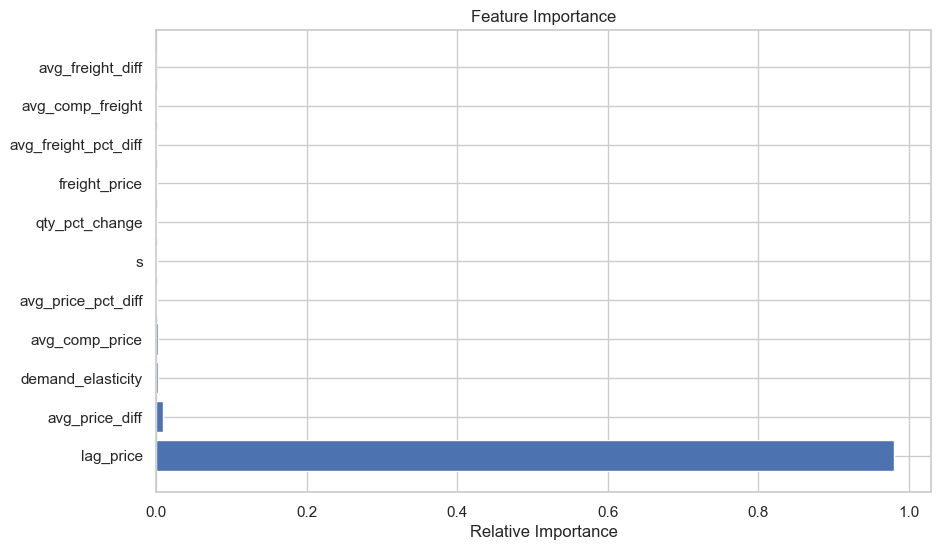

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df[['freight_price', 'lag_price', 'avg_comp_price', 'avg_price_diff', 
        'avg_price_pct_diff', 'avg_comp_freight', 'avg_freight_diff', 
        'avg_freight_pct_diff', 'qty_pct_change', 'demand_elasticity','s'
        ]]
y = df['unit_price']  # Target: Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Feature importance visualization
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Relative Importance")
plt.show()


In [34]:
# Select additional features to include in the model
new_features = [
    'total_price', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 
    'comp_3', 'ps3', 'fp3', 'customers', 'month', 'year', 'is_weekend', 
    'demand_elasticity', 'avg_comp_price', 'avg_price_diff', 'avg_price_pct_diff', 
    'avg_comp_freight', 'avg_freight_diff', 'avg_freight_pct_diff', 'qty_pct_change', 'price_pct_change'
]

# Extract features and target variable
X = df[new_features]  # Features
y = df['unit_price']  # Target variable (price)

# Split the data into training and test sets (90% train, 10% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 2.66935616108823
Mean Squared Error: 29.912331918224407
Root Mean Squared Error: 5.4692167554618285


In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV with XGBoost
xgb_model = XGBRegressor(random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_dist, 
                                       n_iter=50,  # Number of random samples to evaluate
                                       cv=5, 
                                       scoring='neg_mean_squared_error',
                                       verbose=2, 
                                       n_jobs=-1, 
                                       random_state=42)

# Fit RandomizedSearchCV
random_search_xgb.fit(X, y)

# Get the best parameters
print(f'Best Parameters for XGBoost: {random_search_xgb.best_params_}')
print(f'Best CV MSE (negative) for XGBoost: {random_search_xgb.best_score_}')
print(f'Best CV RMSE for XGBoost: {np.sqrt(-random_search_xgb.best_score_)}')

# Train the best model
best_xgb_model = random_search_xgb.best_estimator_

# Predictions and final evaluation
y_pred_xgb = best_xgb_model.predict(X)

# Final evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y, y_pred_xgb)
mse_xgb = mean_squared_error(y, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y, y_pred_xgb)

print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')
print(f'R^2 Score (XGBoost): {r2_xgb}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best CV MSE (negative) for XGBoost: -142.8684433416443
Best CV RMSE for XGBoost: 11.952758817178749
Mean Absolute Error (XGBoost): 0.5696954623651158
Mean Squared Error (XGBoost): 0.5561824926682106
Root Mean Squared Error (XGBoost): 0.7457764361175611
R^2 Score (XGBoost): 0.9998426658745233


In [36]:
import joblib

# Save the trained RandomForest model
joblib.dump(rf_model, 'rf_optimal_pricing_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [37]:
# Assuming df is your original dataset
df['predicted_optimal_price'] = rf_model.predict(df[new_features])

# Display the first few rows to verify the predictions
print(df[['product_id', 'predicted_optimal_price']].head())


  product_id  predicted_optimal_price
0       bed1                    47.49
1       bed1                    47.95
2       bed1                    47.73
3       bed1                    46.28
4       bed1                    48.46


In [38]:
# Display the 'unit_price' and 'predicted_optimal_price' columns for comparison
comparison_df = df[['product_id', 'unit_price', 'predicted_optimal_price']]

# Display the first few rows of the comparison
print(comparison_df.head())


  product_id  unit_price  predicted_optimal_price
0       bed1       45.95                    47.49
1       bed1       45.95                    47.95
2       bed1       45.95                    47.73
3       bed1       45.95                    46.28
4       bed1       45.95                    48.46


In [39]:
# Display the 'product_id', 'unit_price', and 'predicted_optimal_price' columns for comparison
recommended_prices = df[['product_id','month_year' ,'unit_price', 'predicted_optimal_price']]

# Display the first few rows of the table
print(recommended_prices.head())


  product_id month_year  unit_price  predicted_optimal_price
0       bed1 2017-05-01       45.95                    47.49
1       bed1 2017-06-01       45.95                    47.95
2       bed1 2017-07-01       45.95                    47.73
3       bed1 2017-08-01       45.95                    46.28
4       bed1 2017-09-01       45.95                    48.46


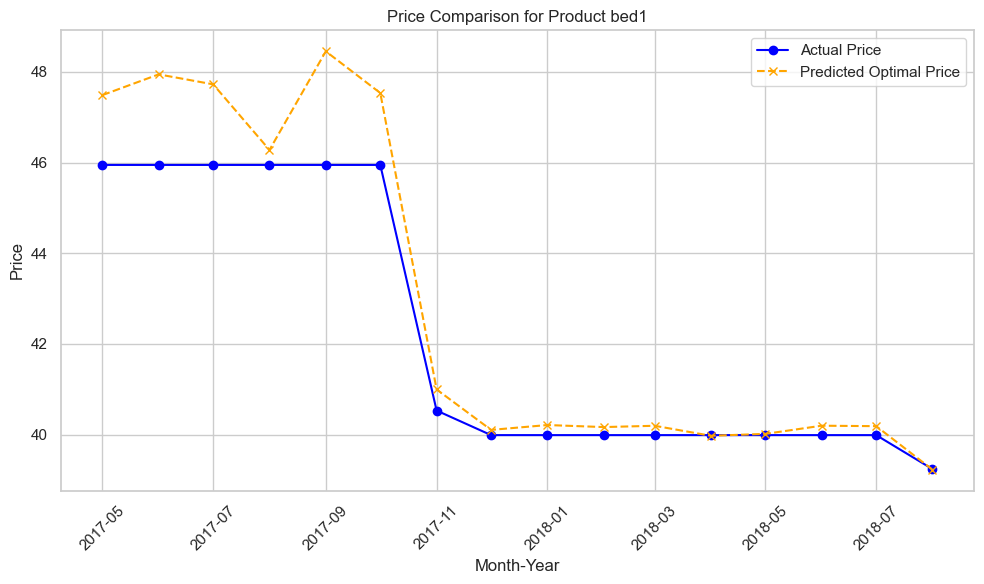

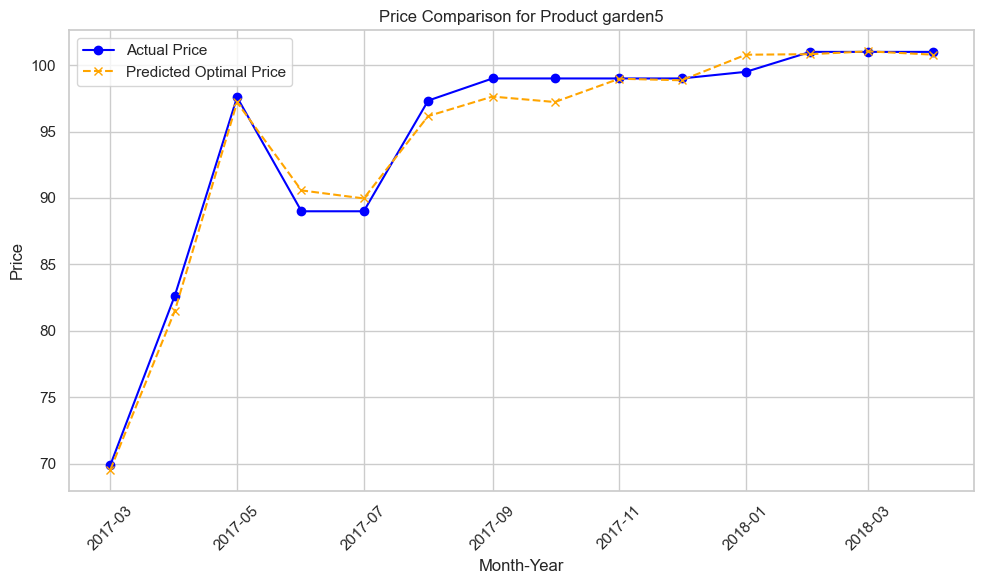

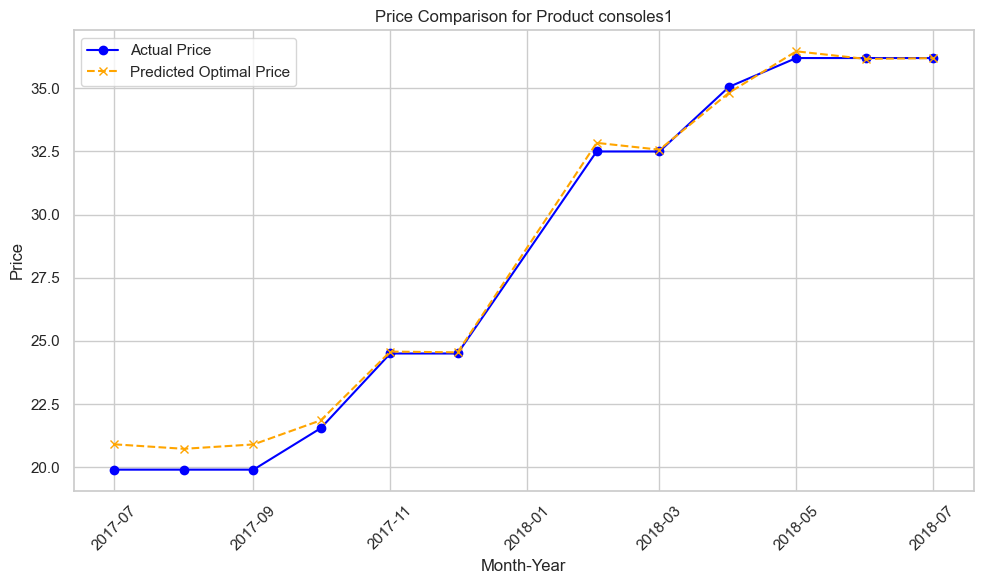

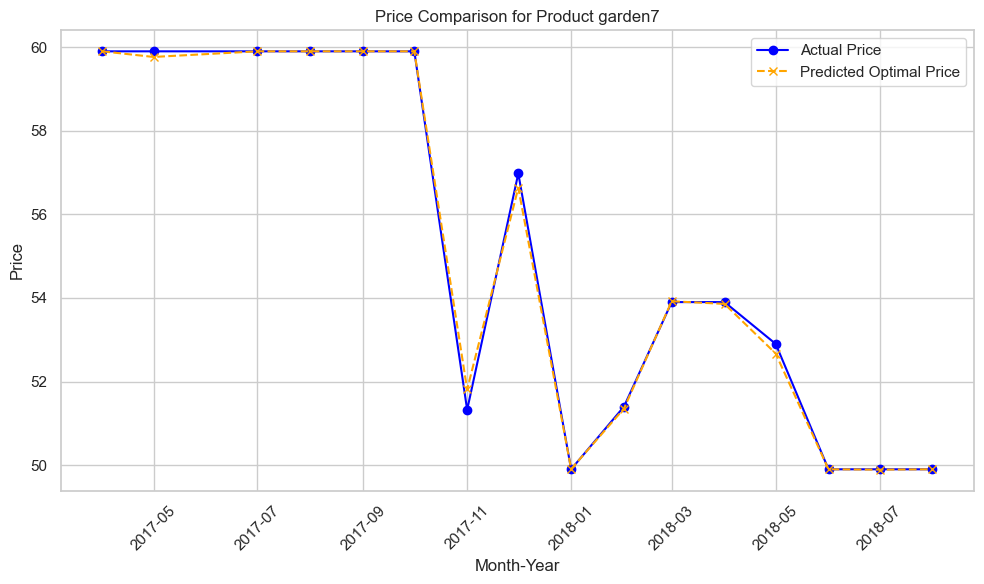

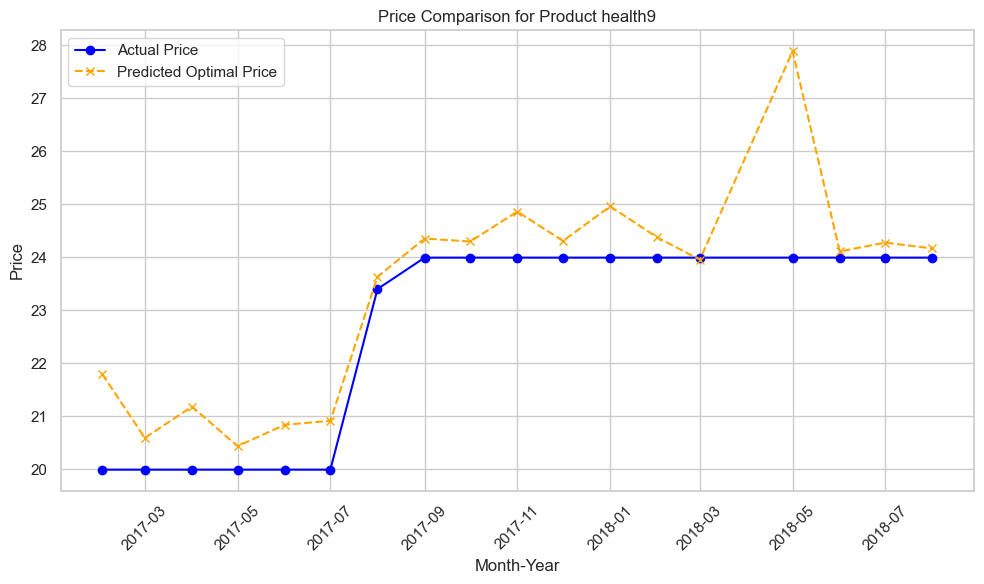

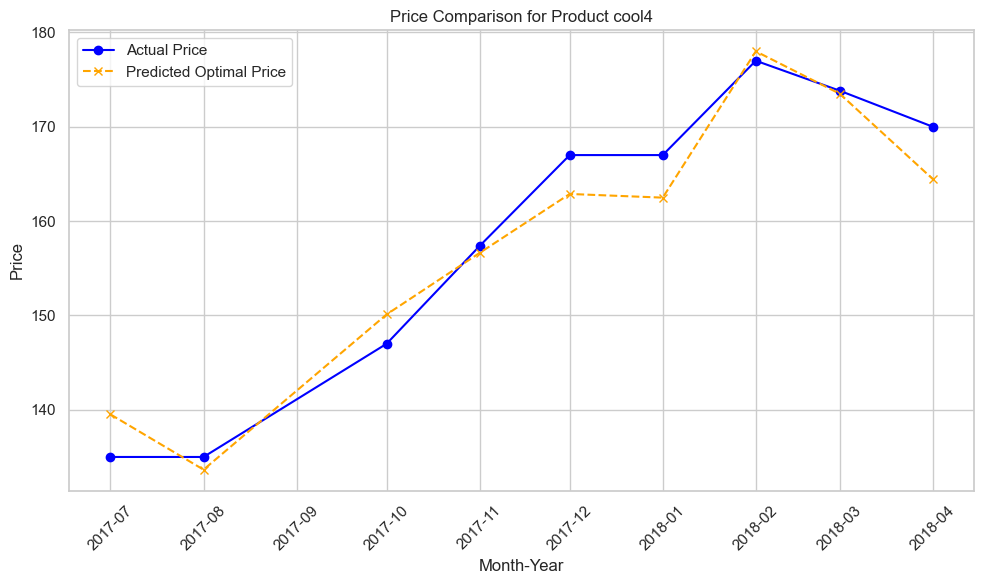

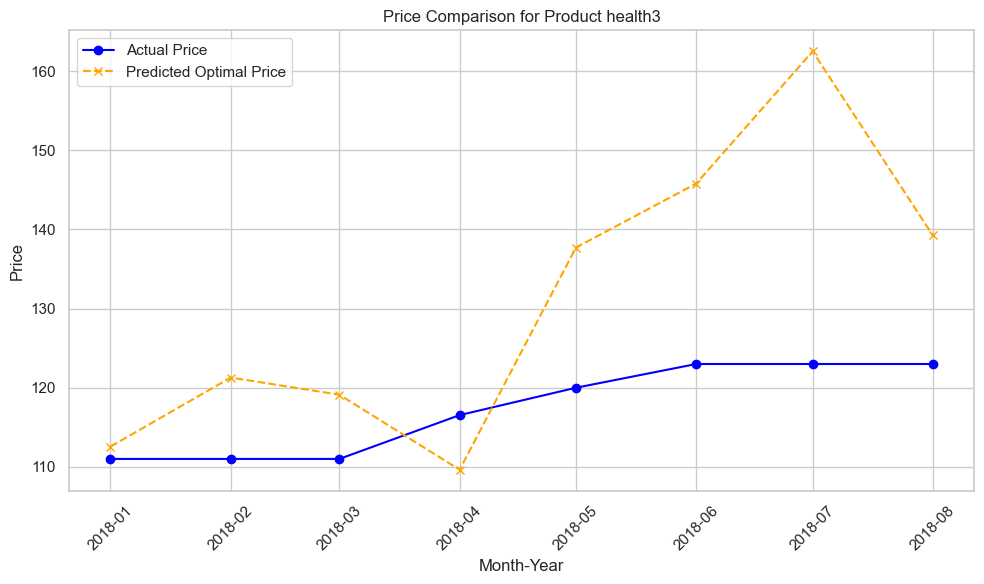

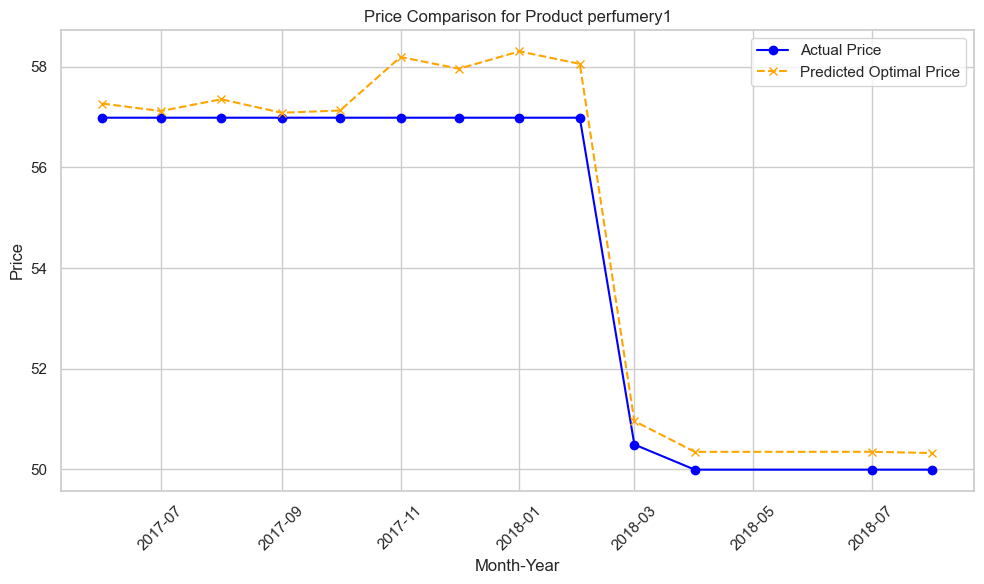

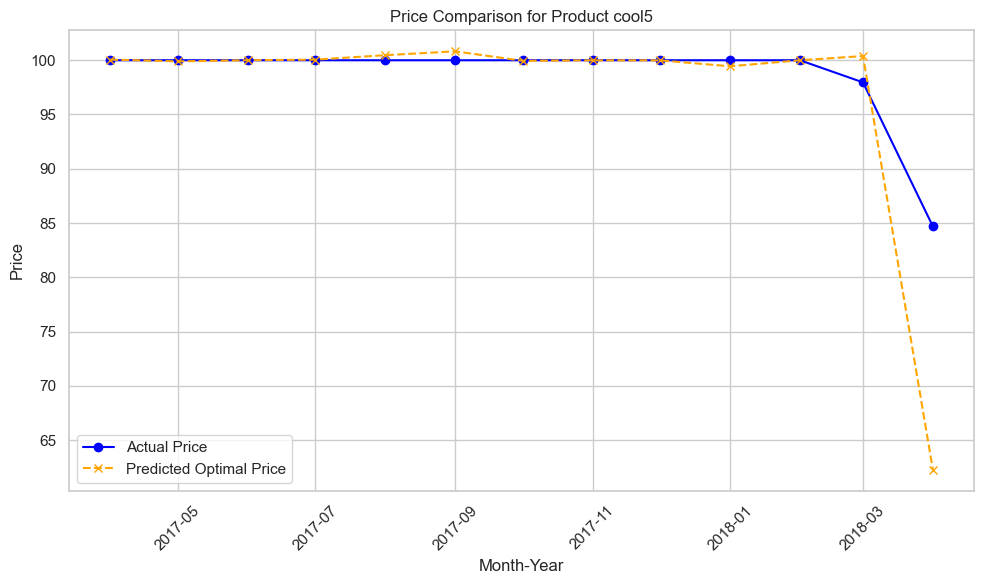

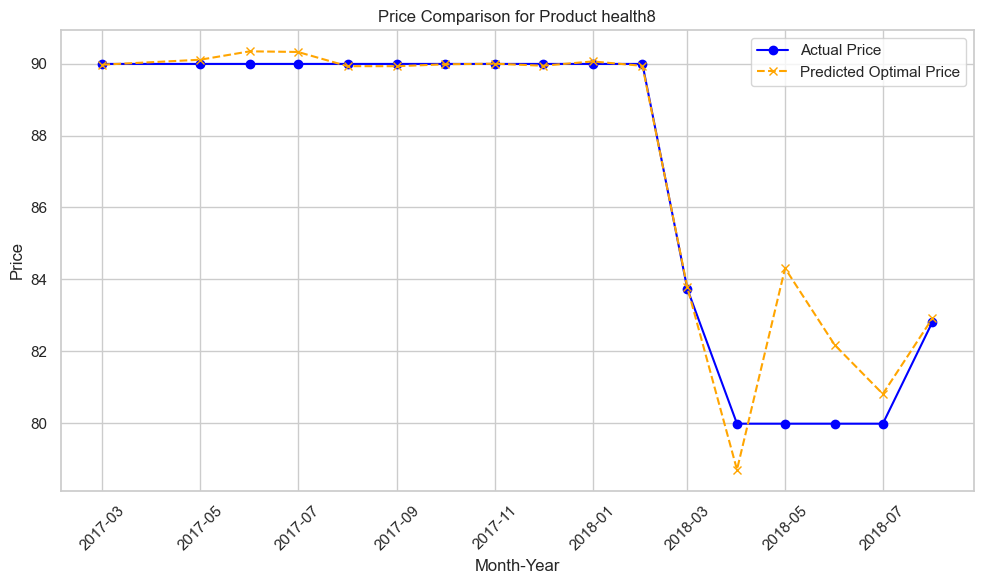

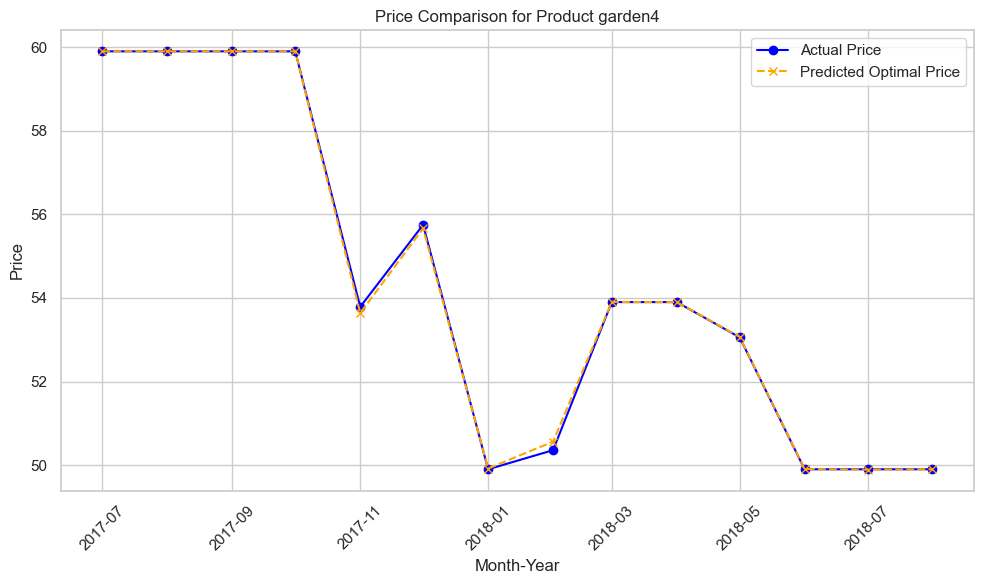

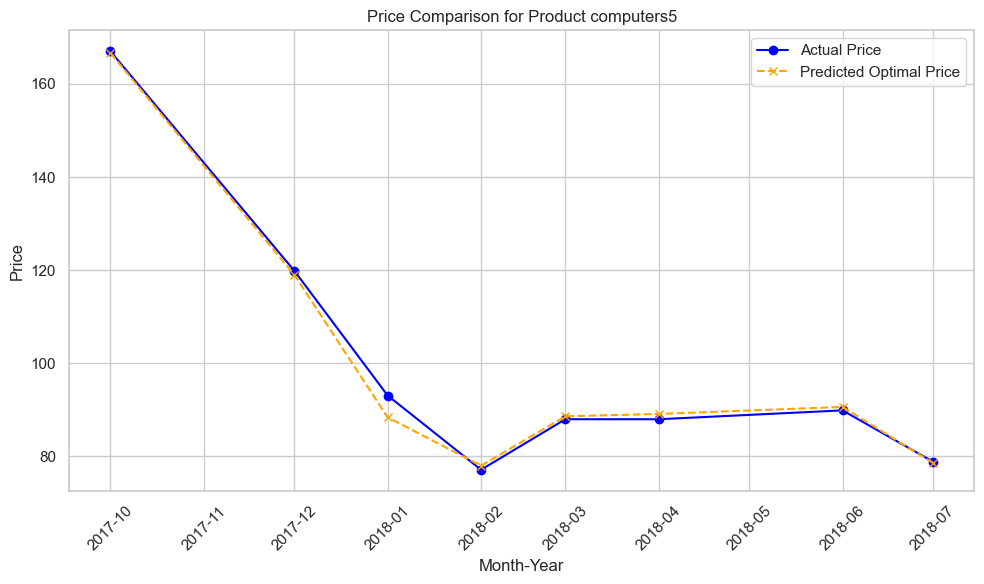

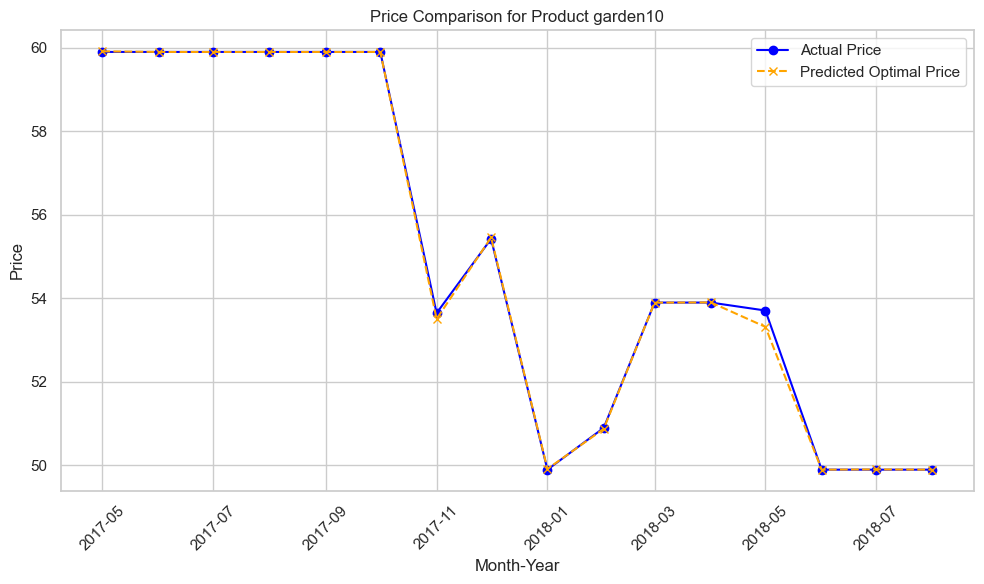

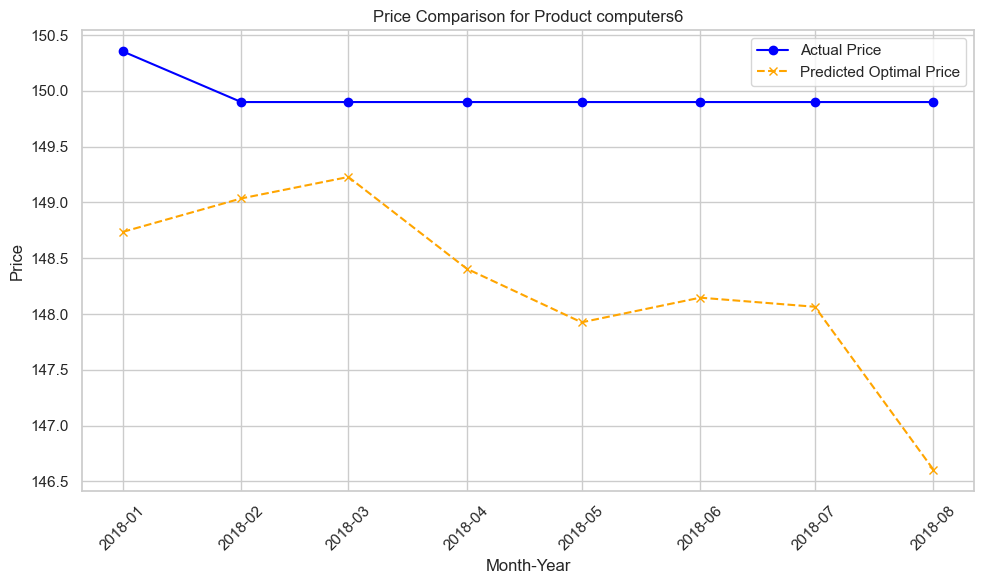

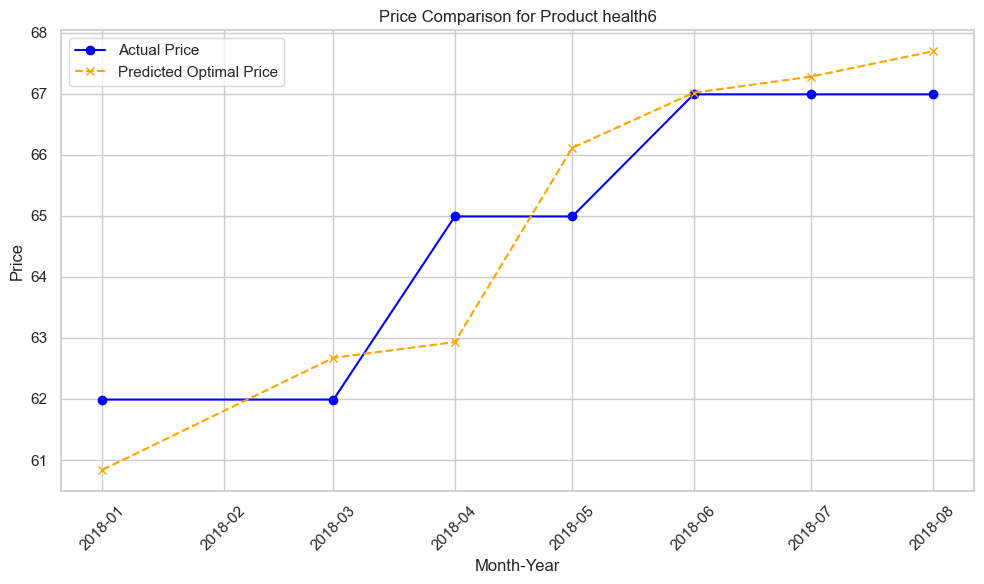

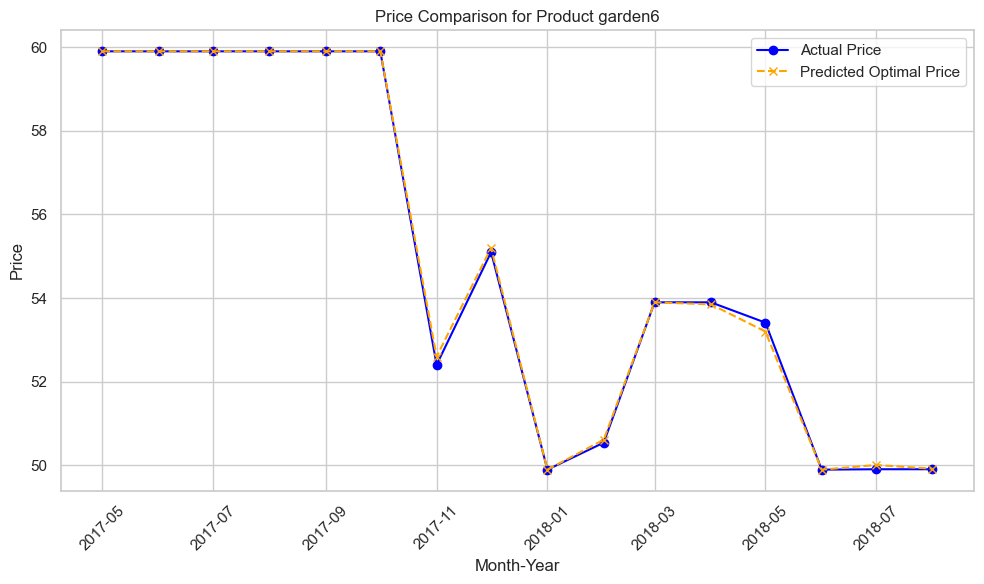

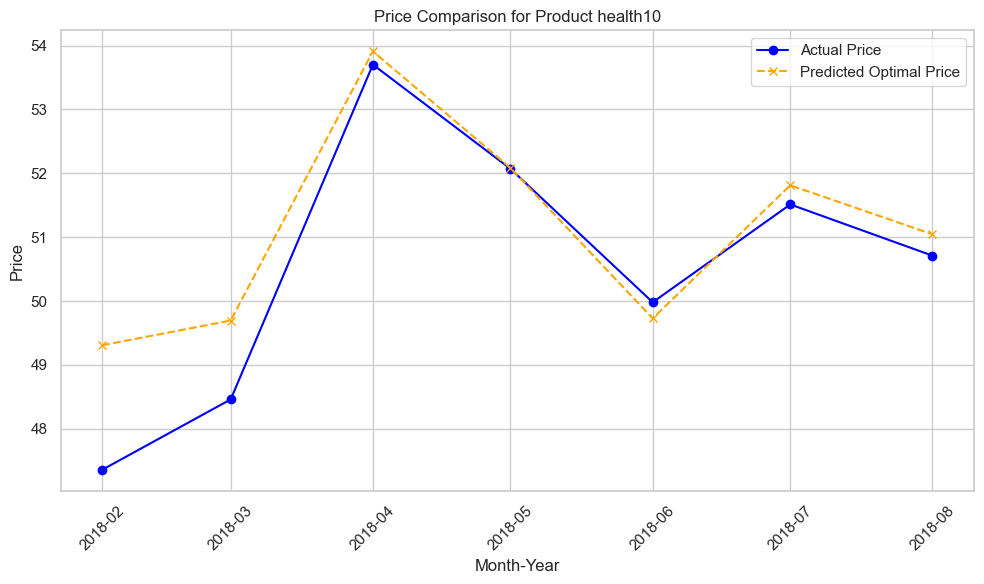

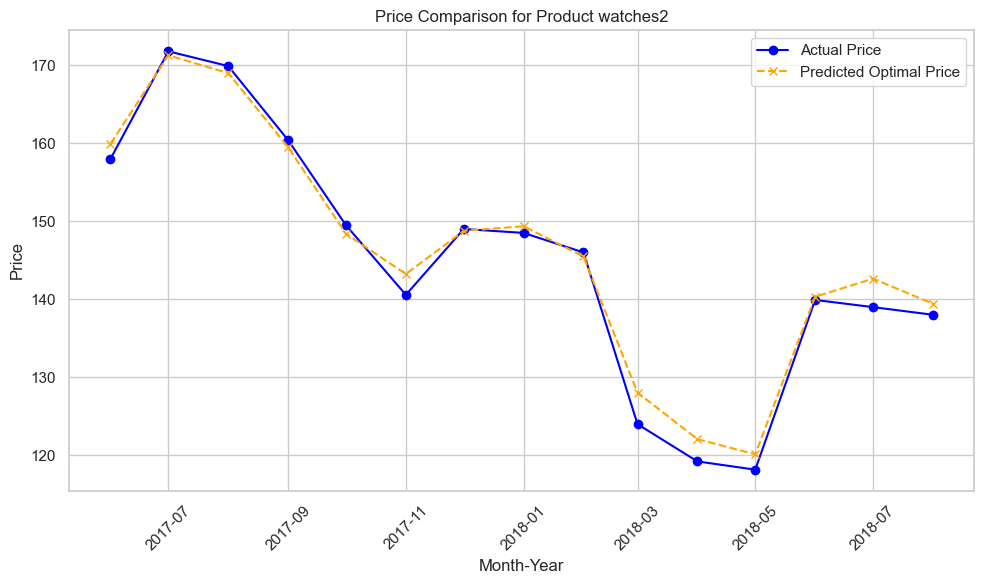

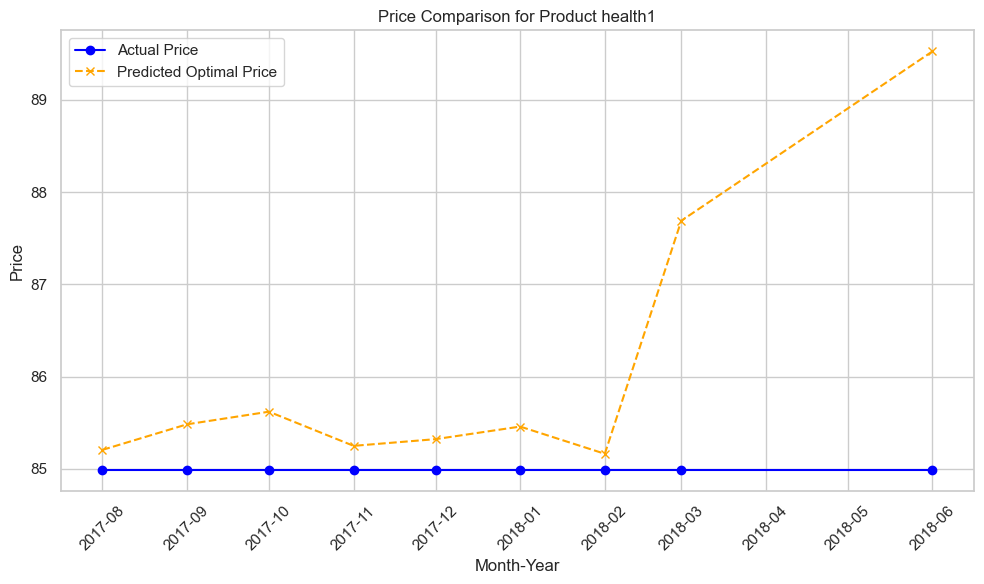

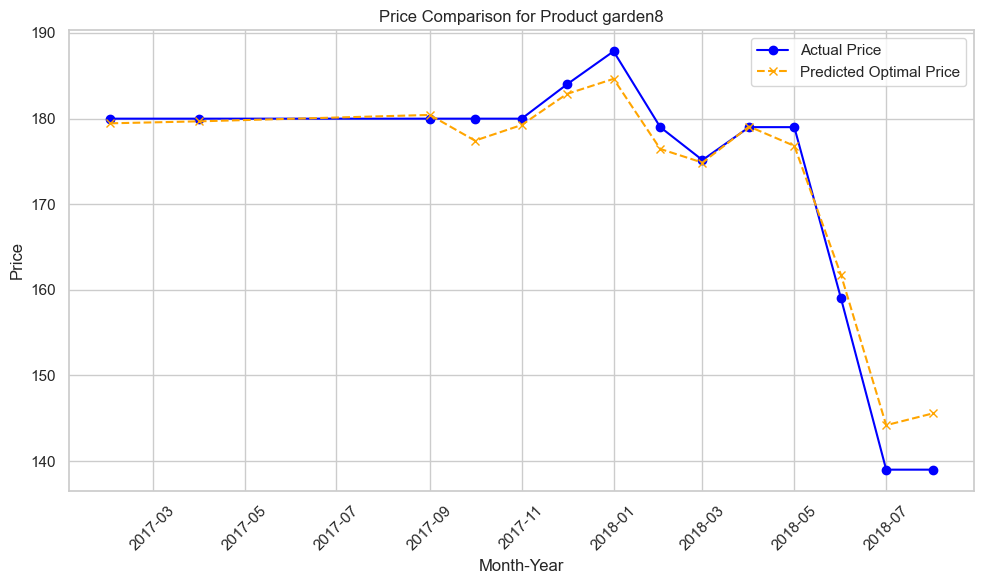

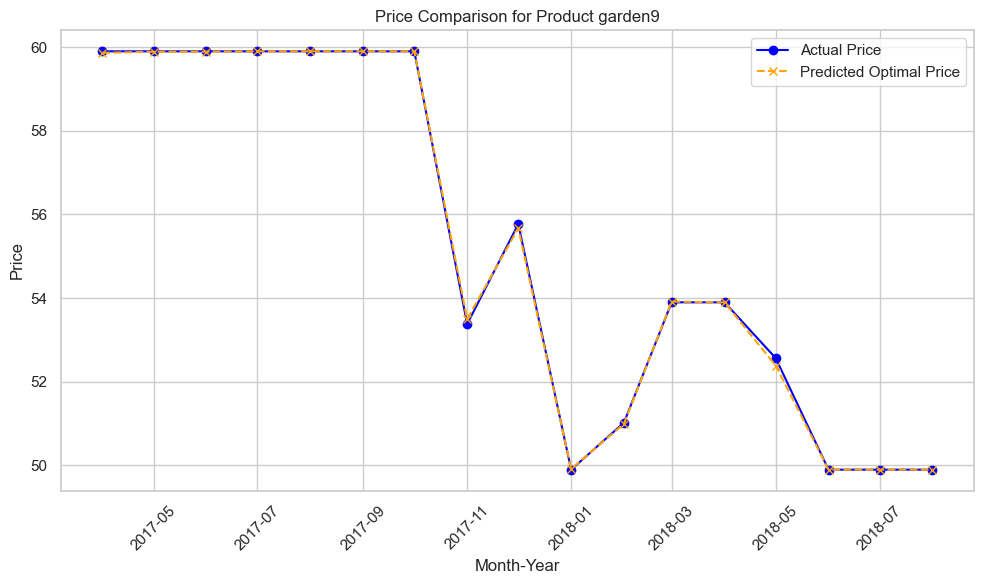

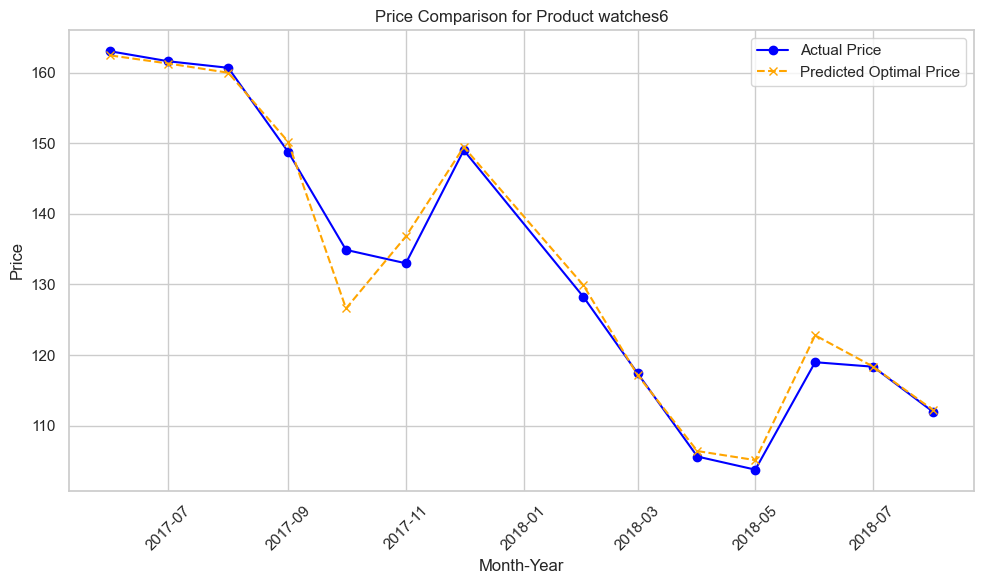

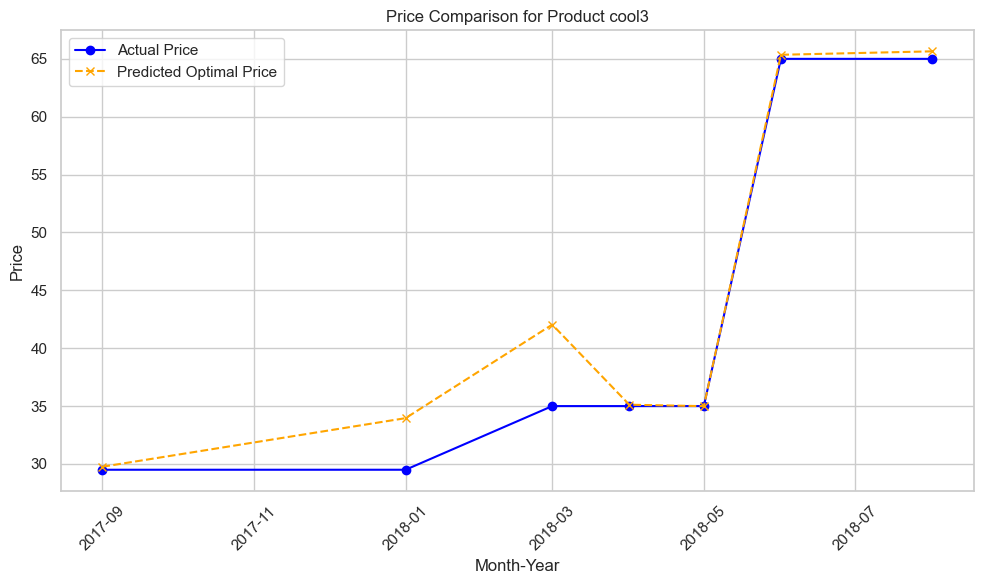

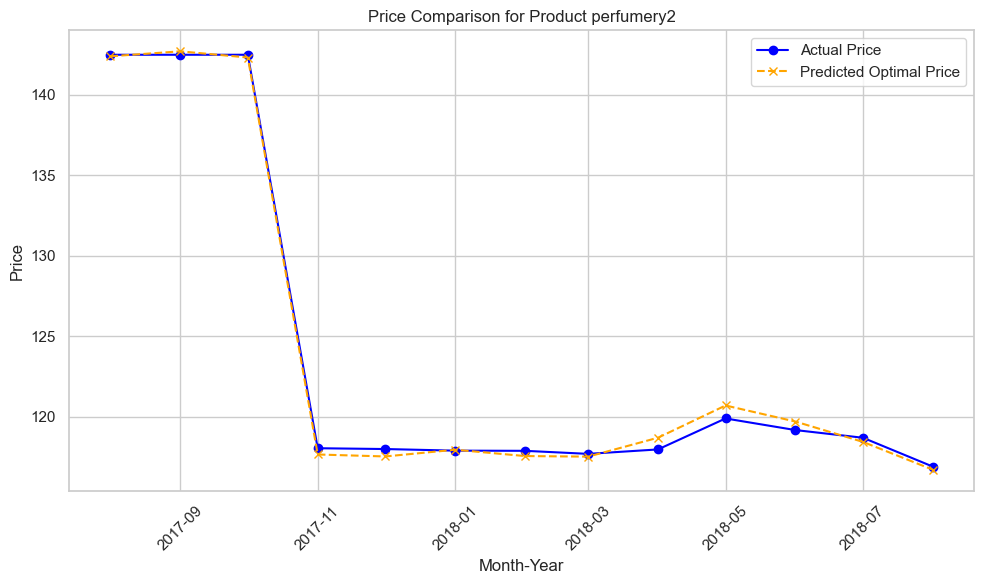

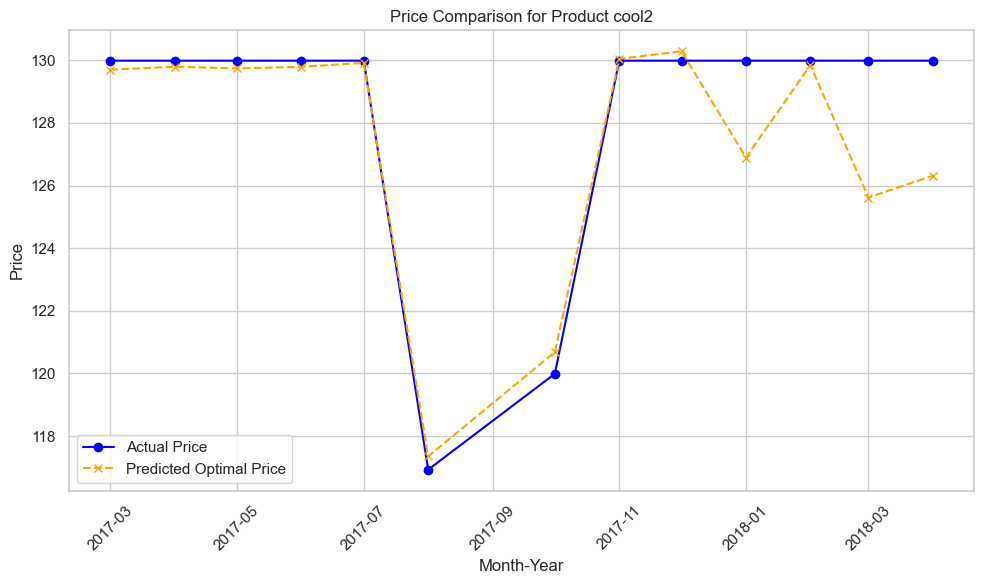

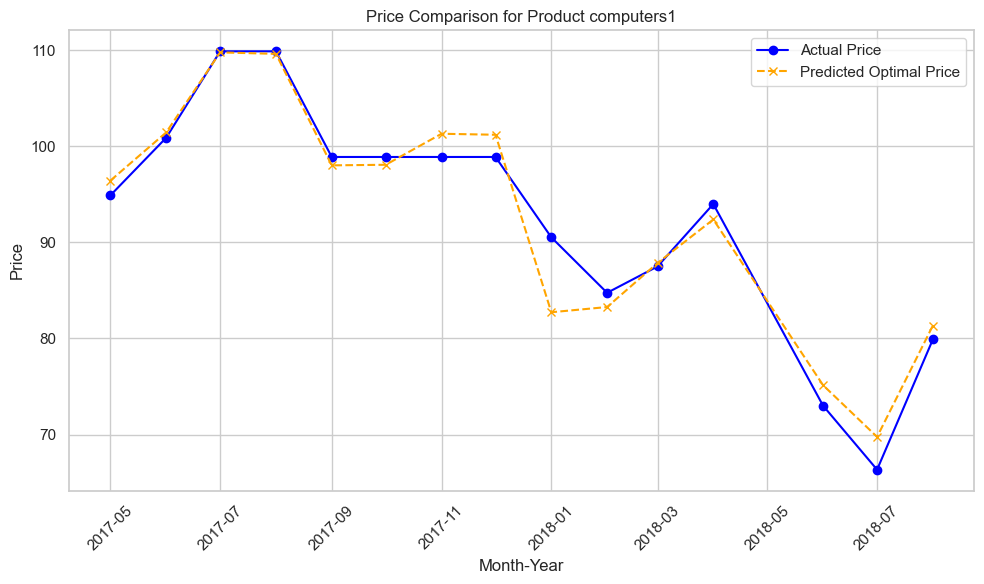

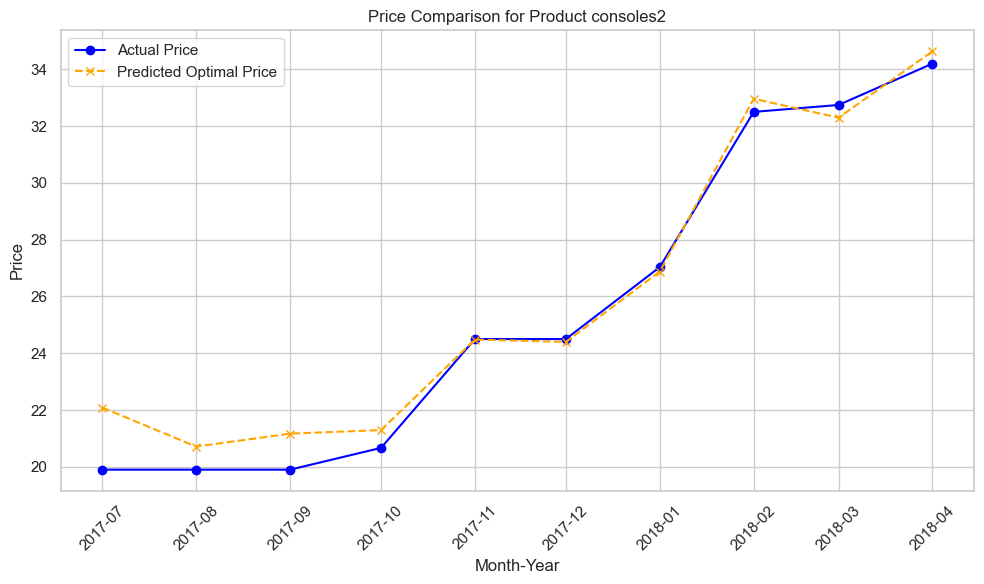

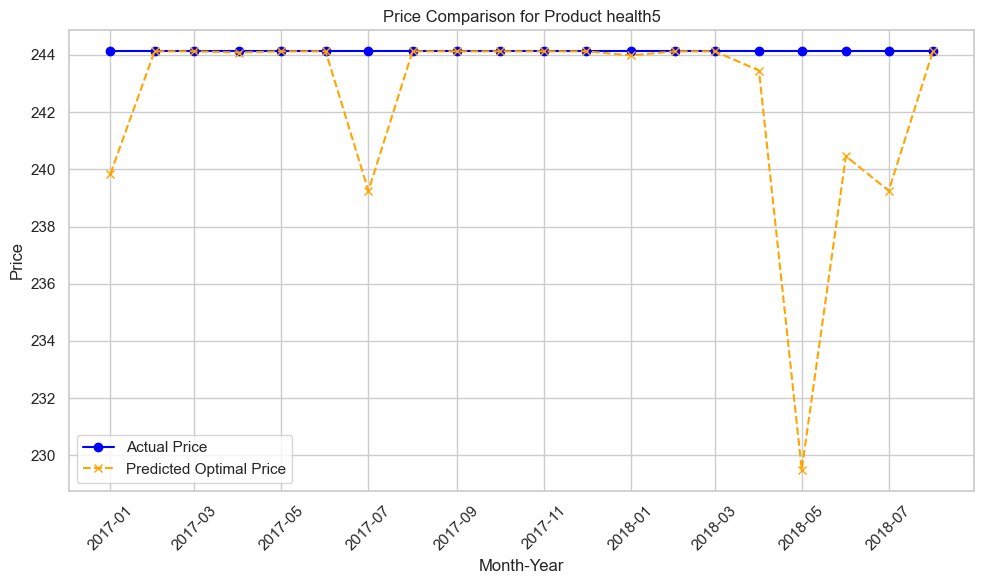

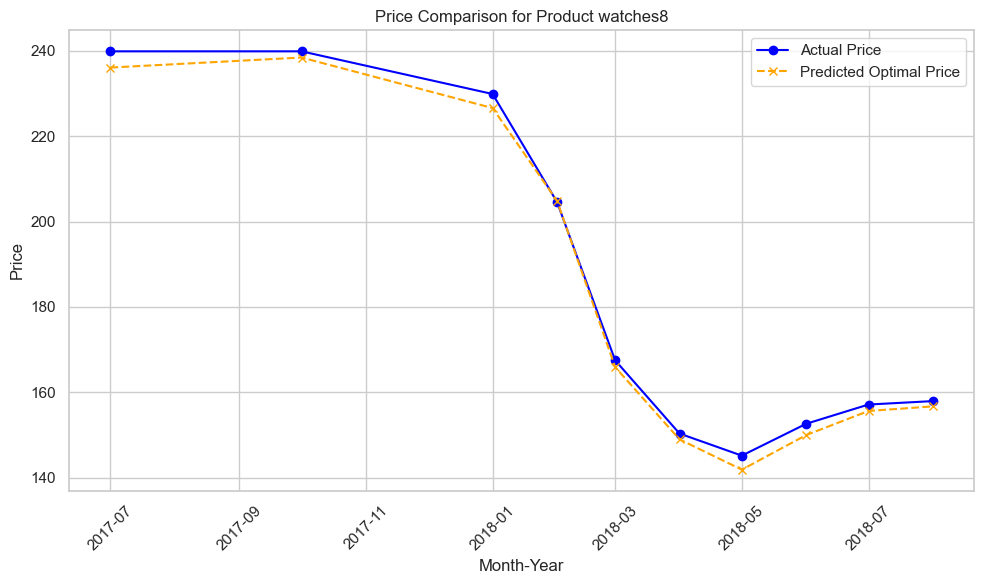

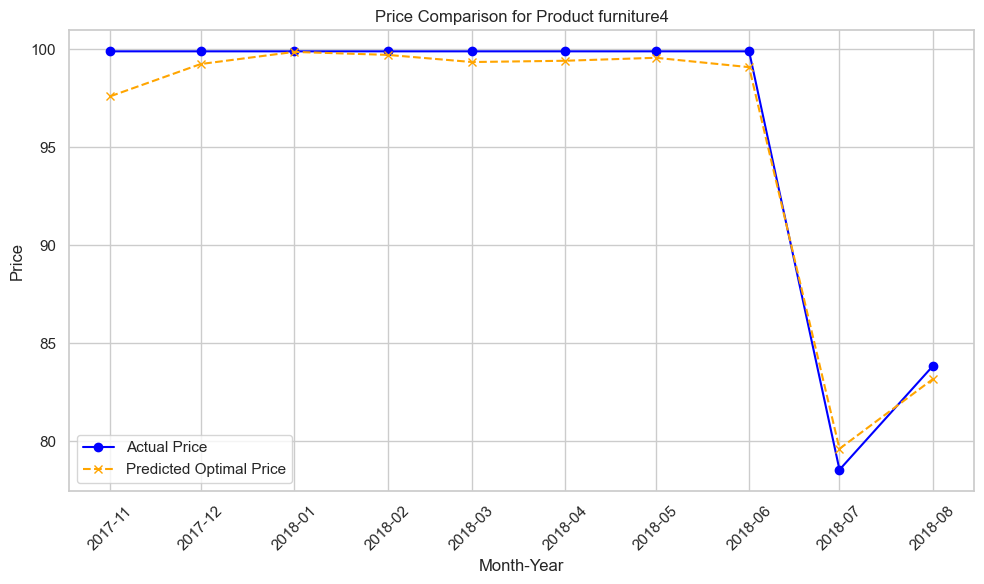

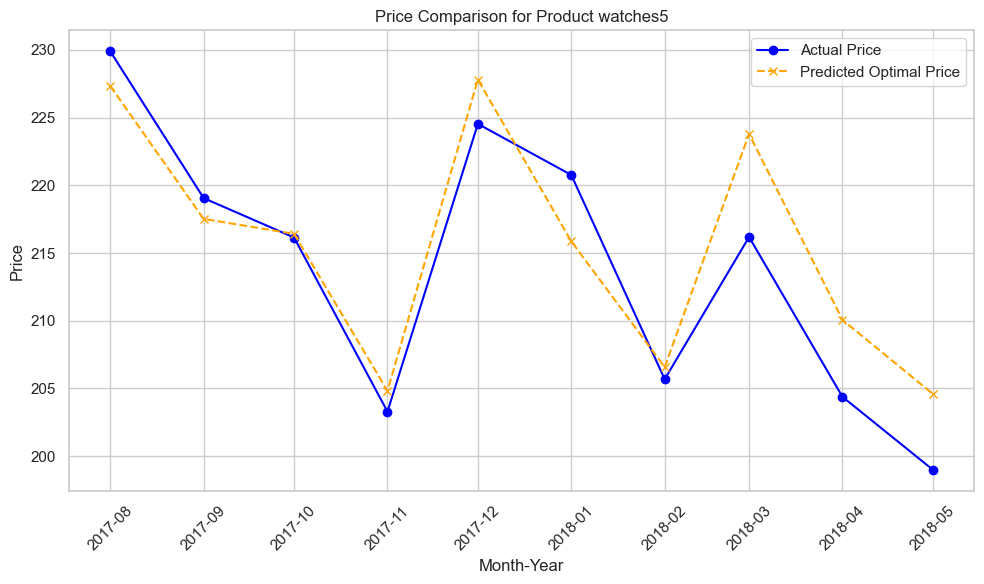

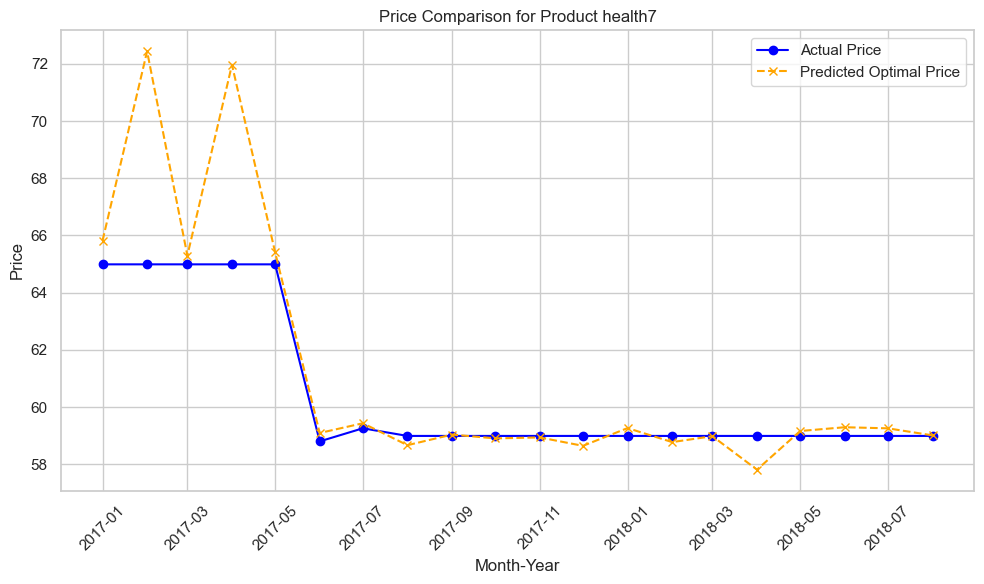

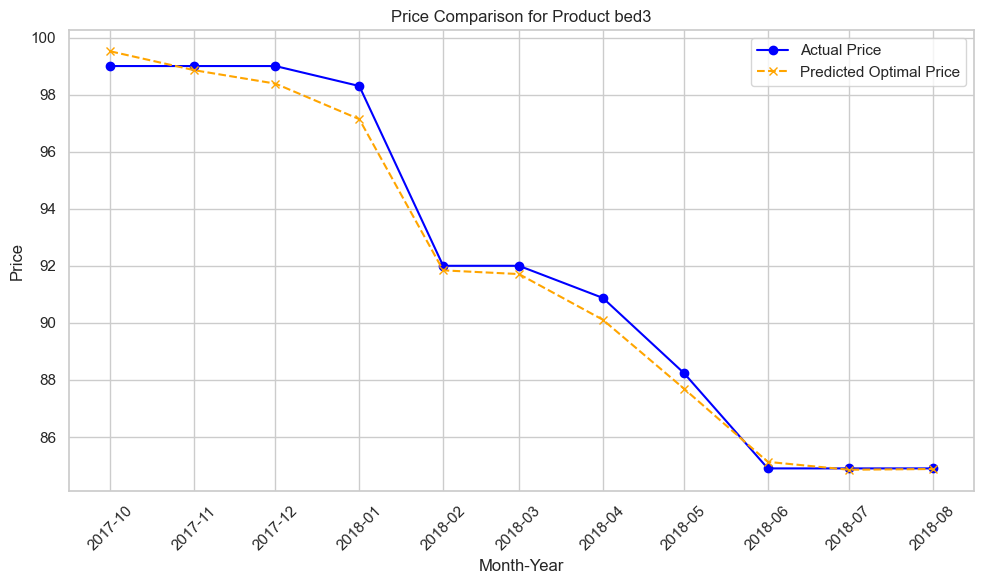

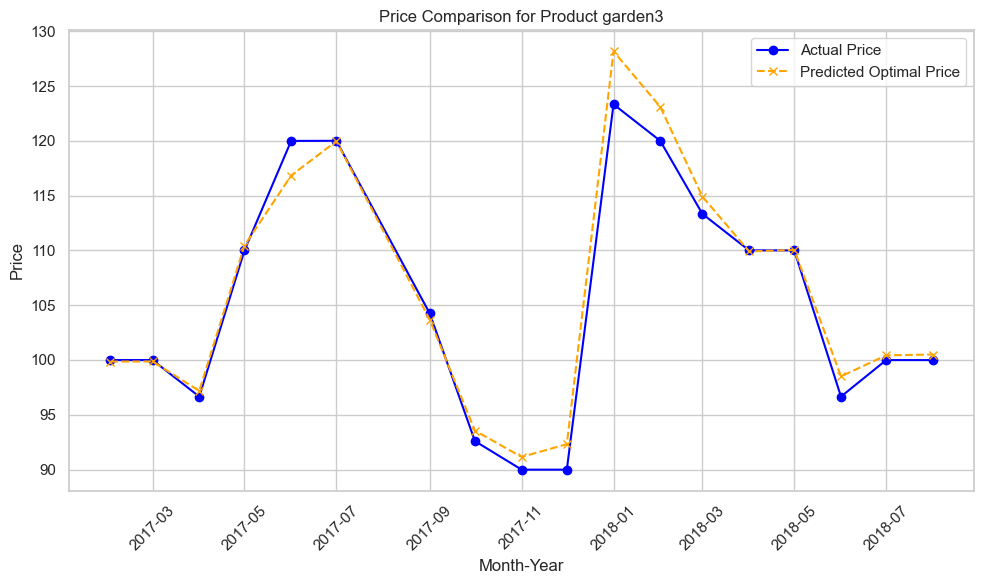

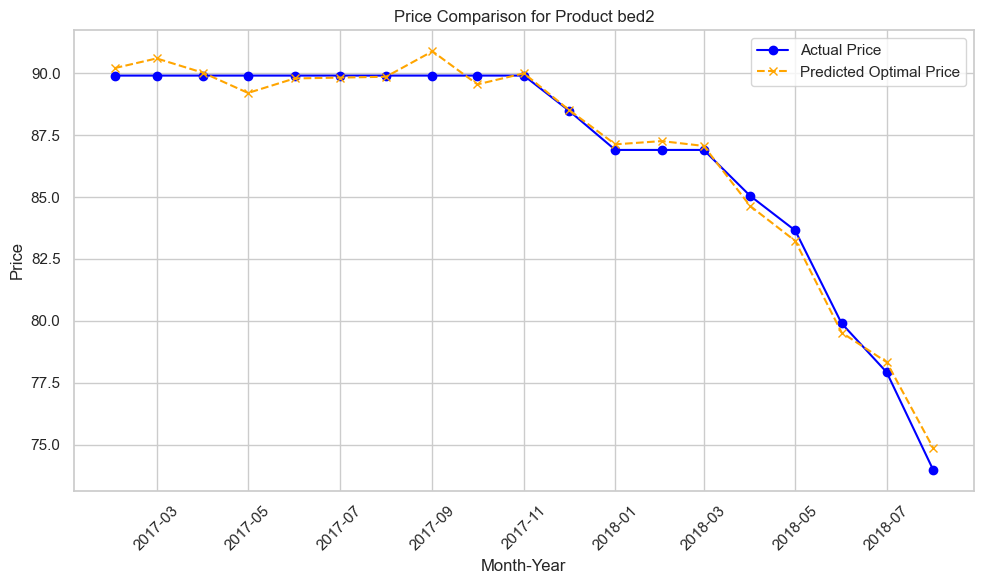

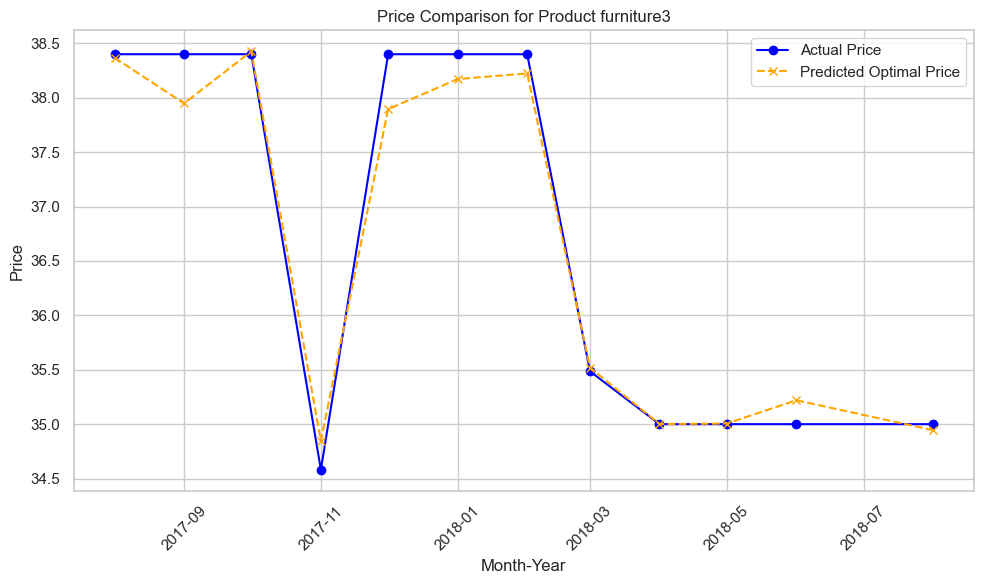

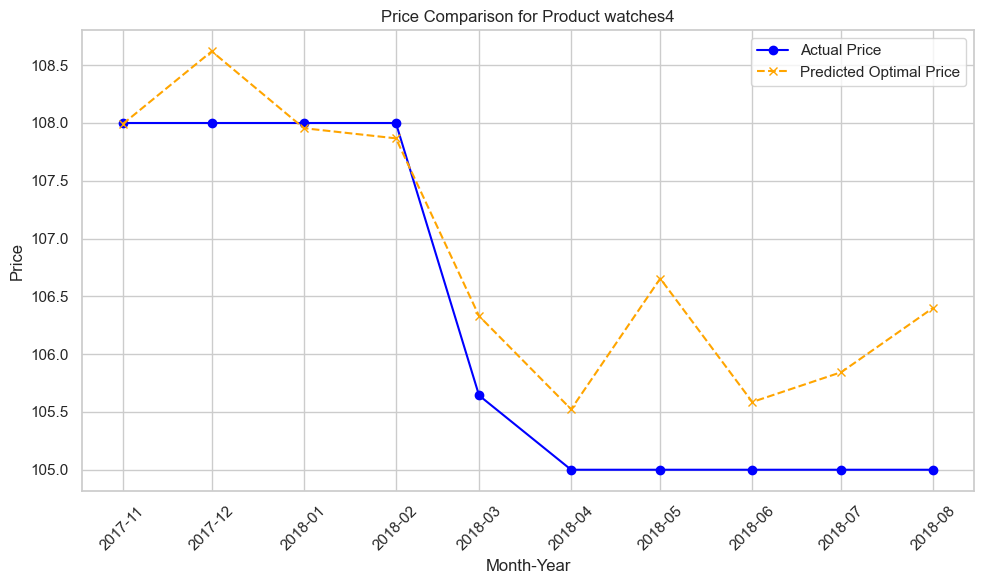

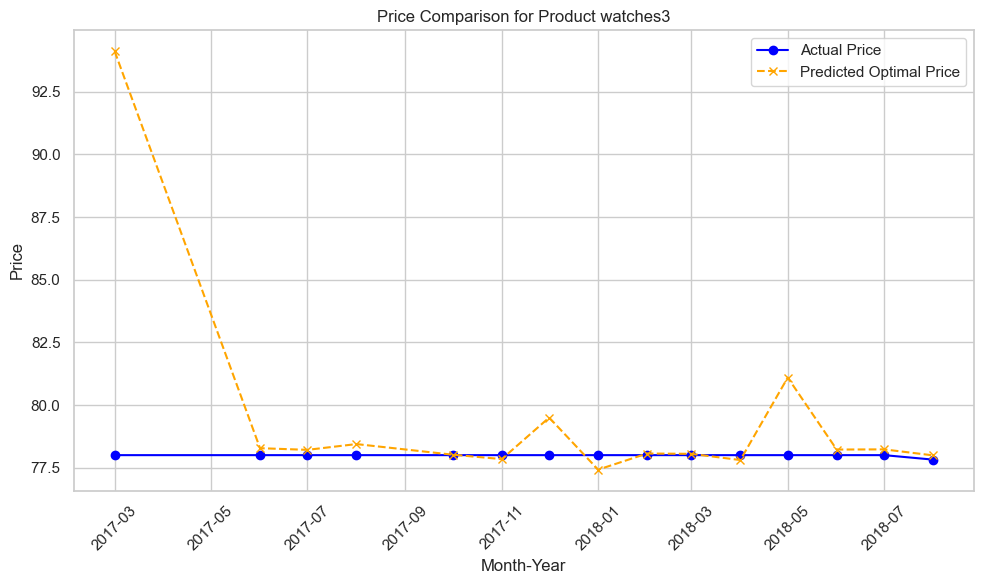

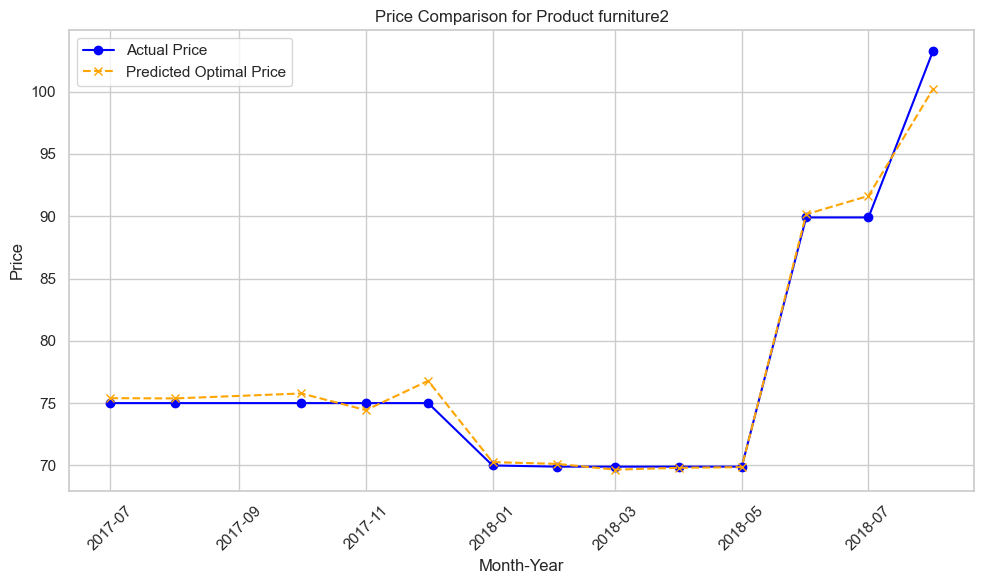

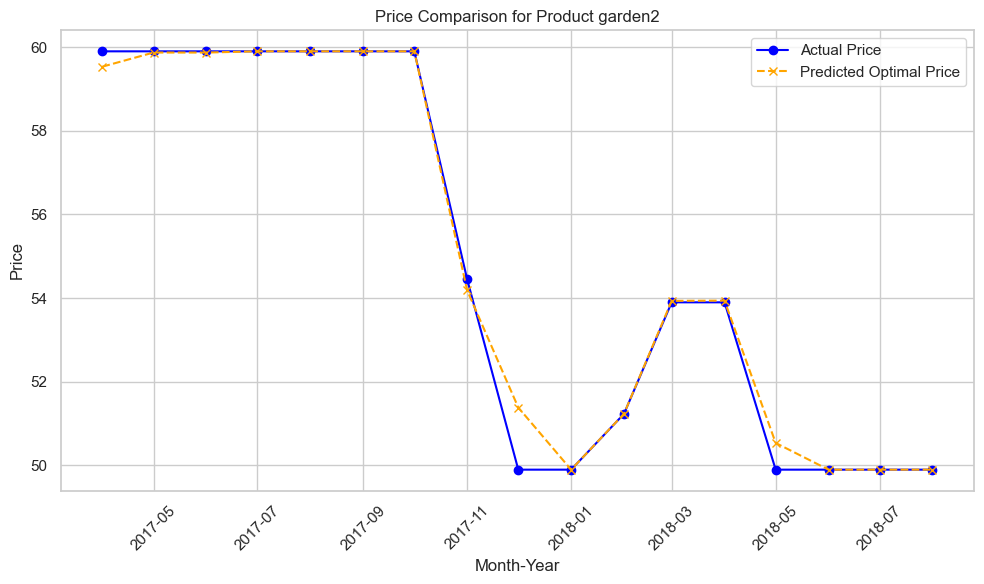

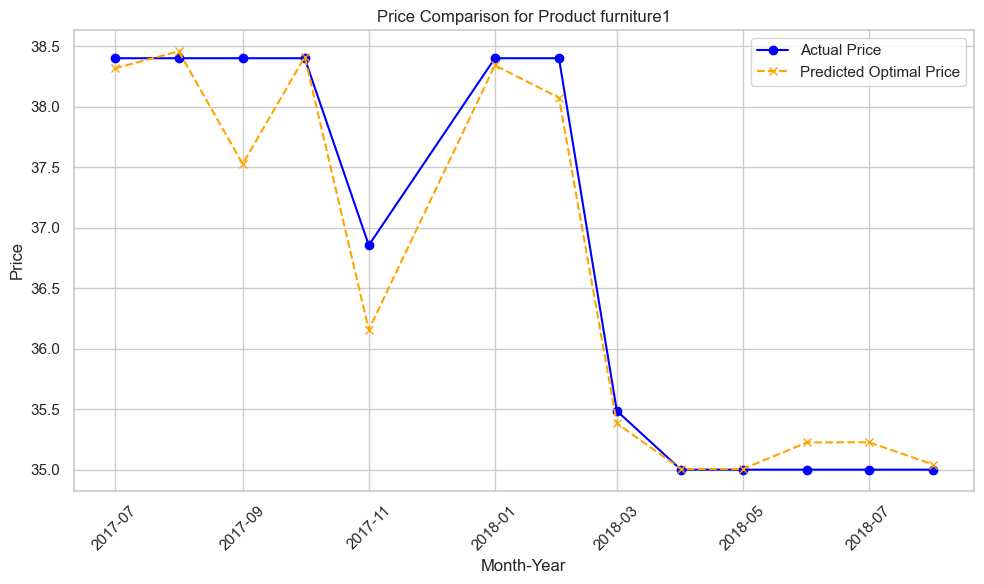

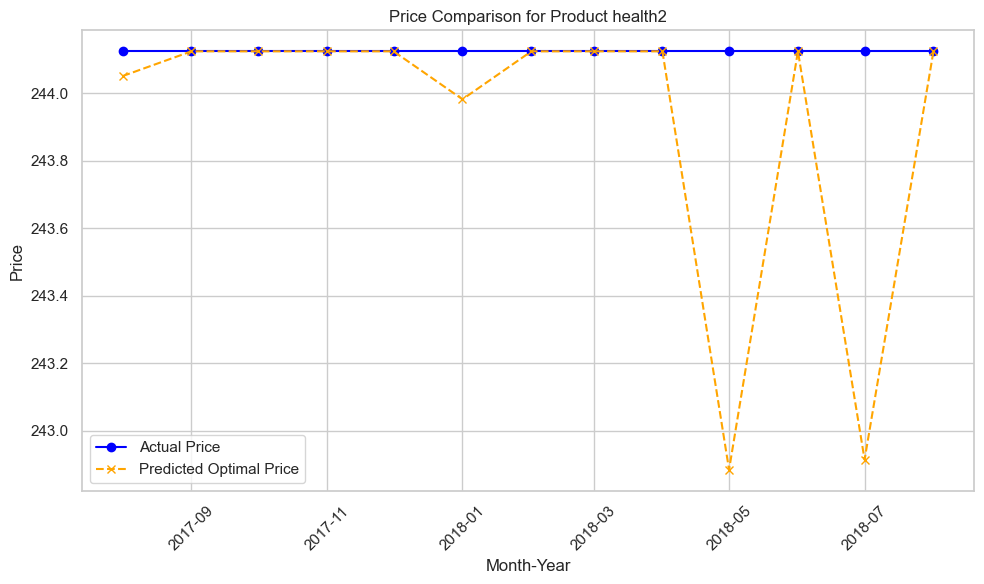

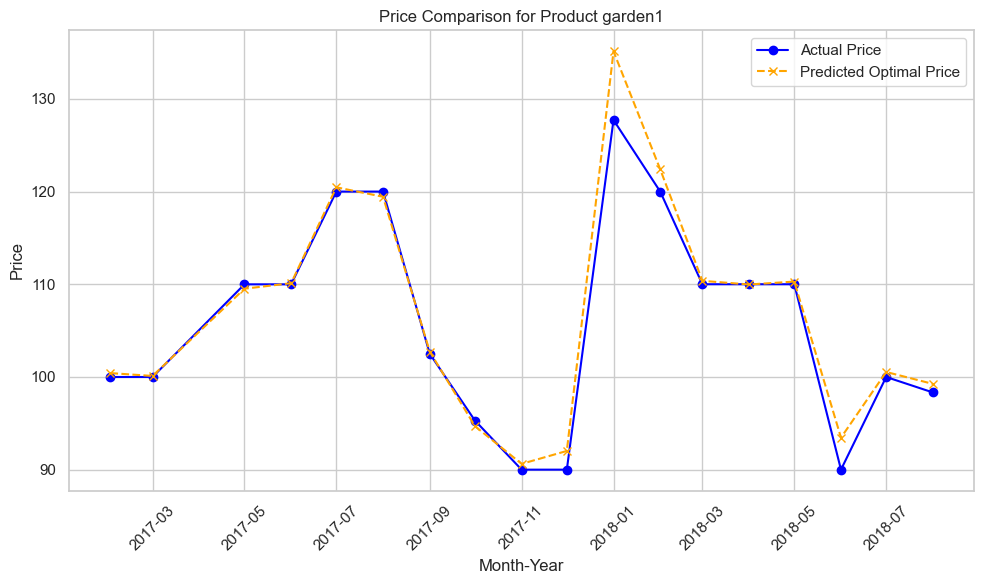

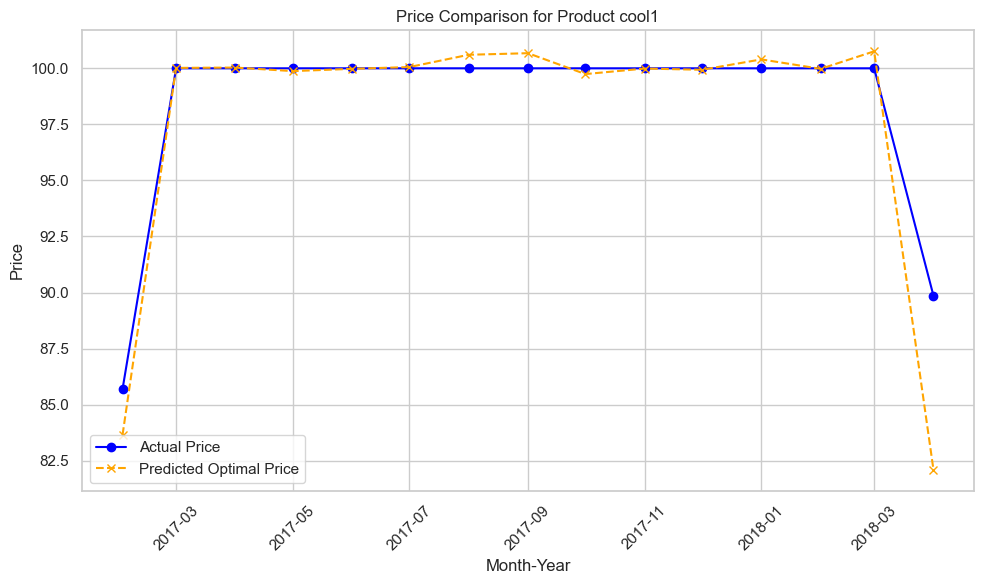

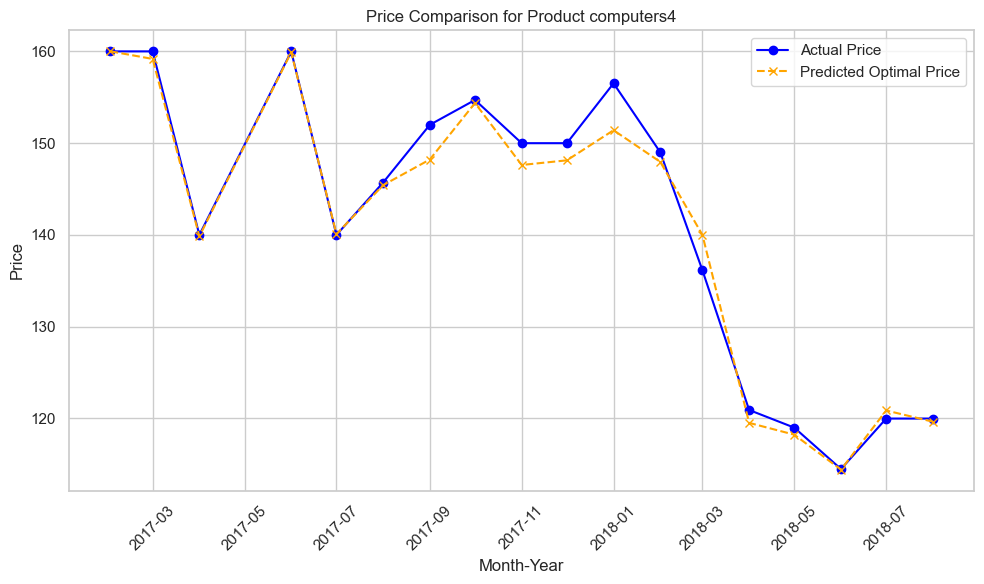

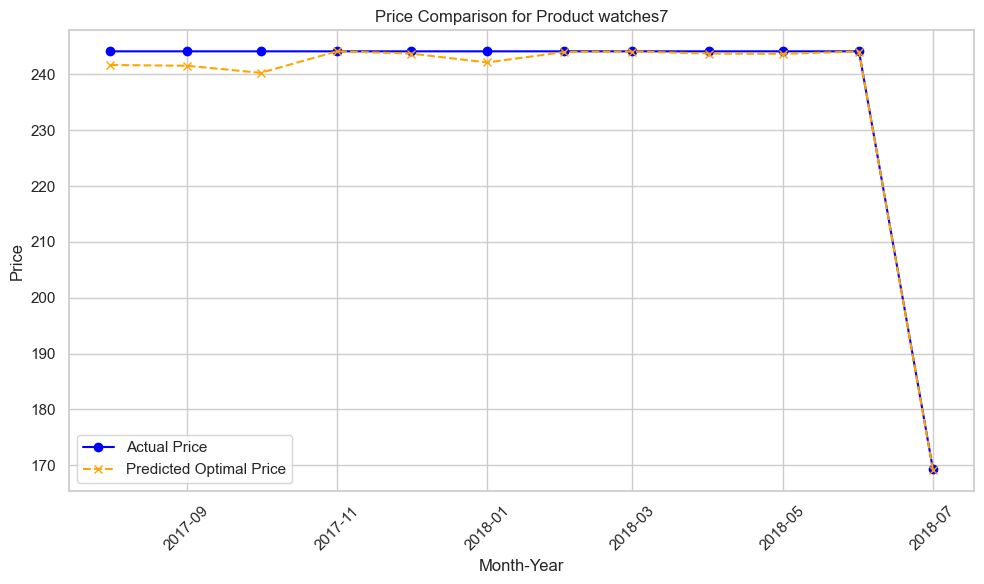

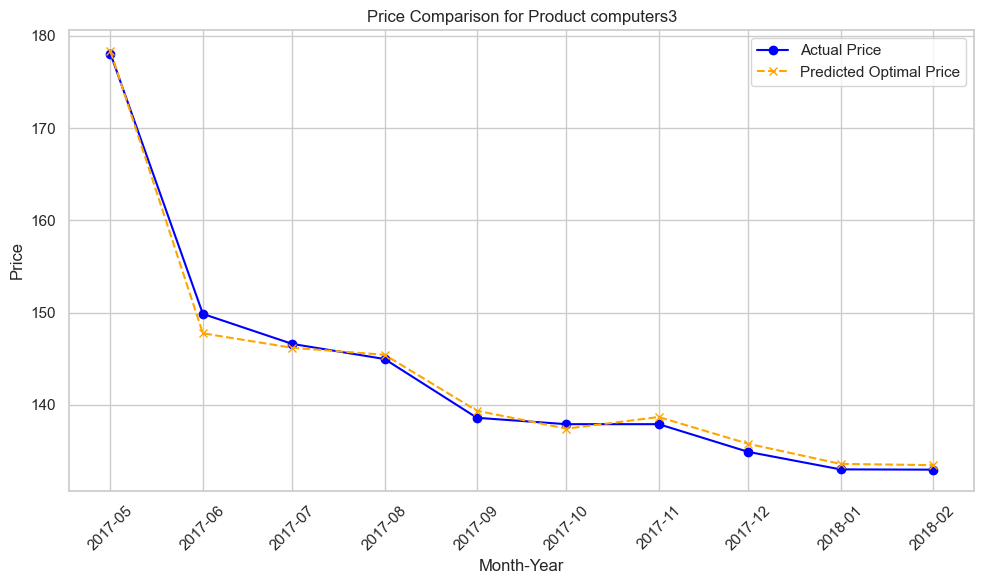

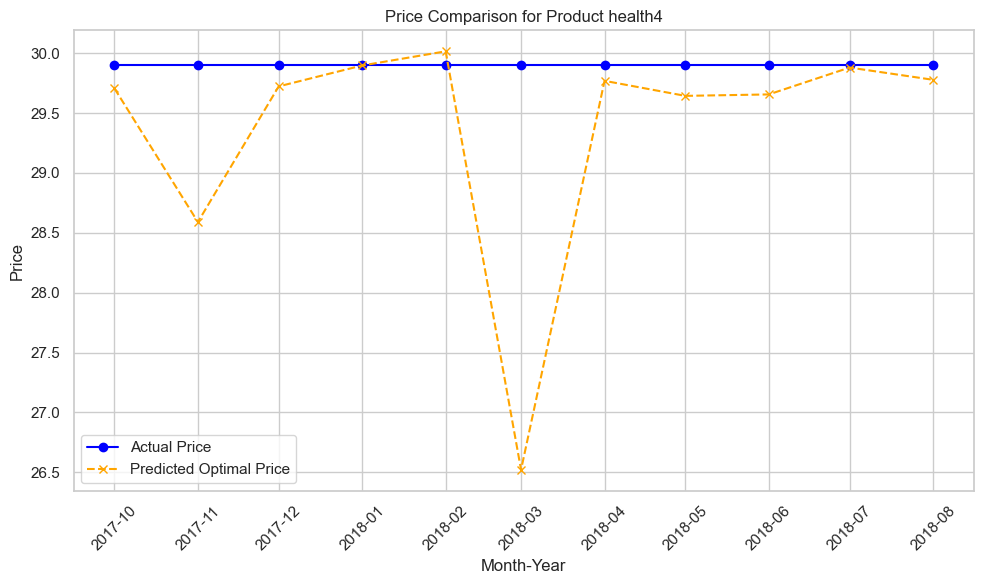

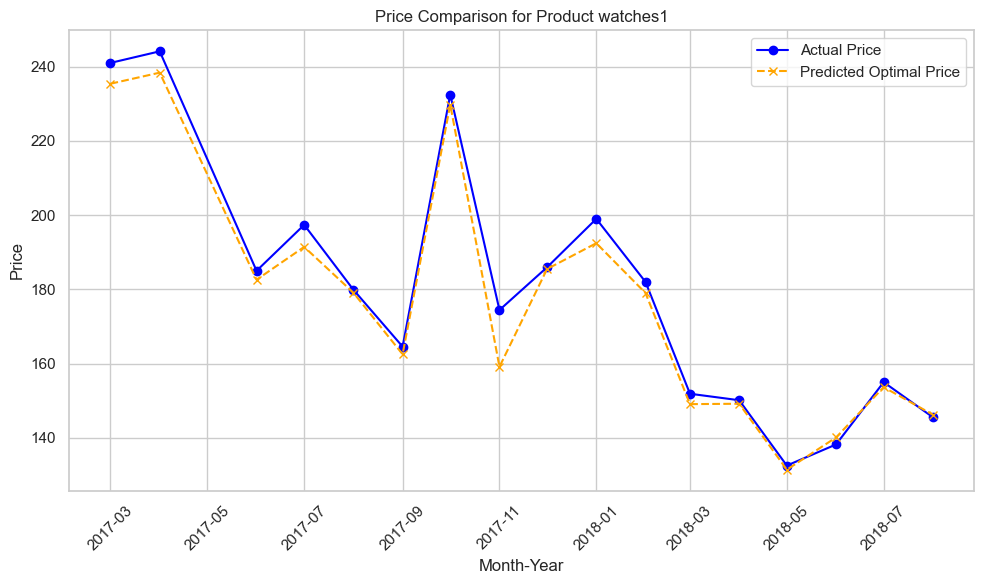

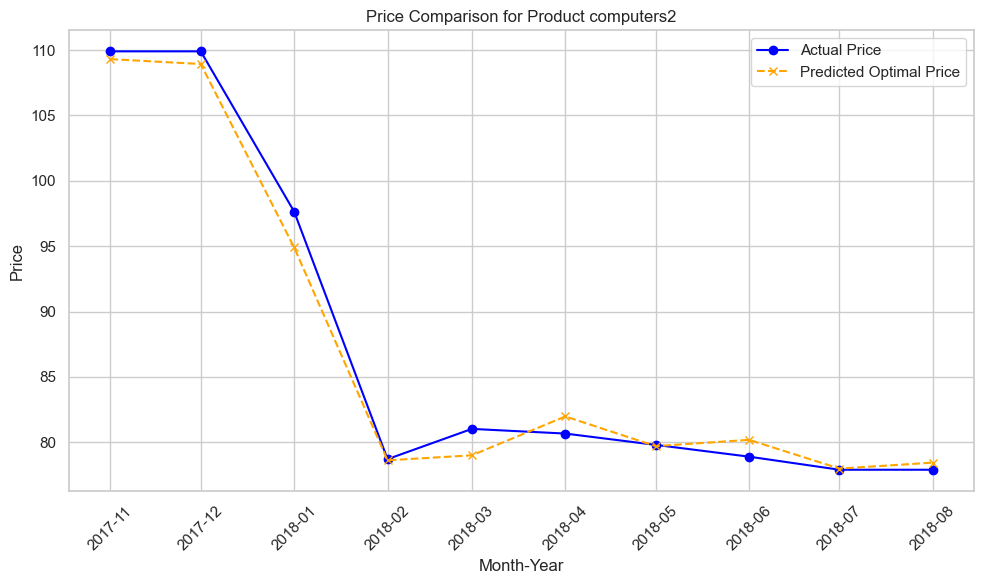

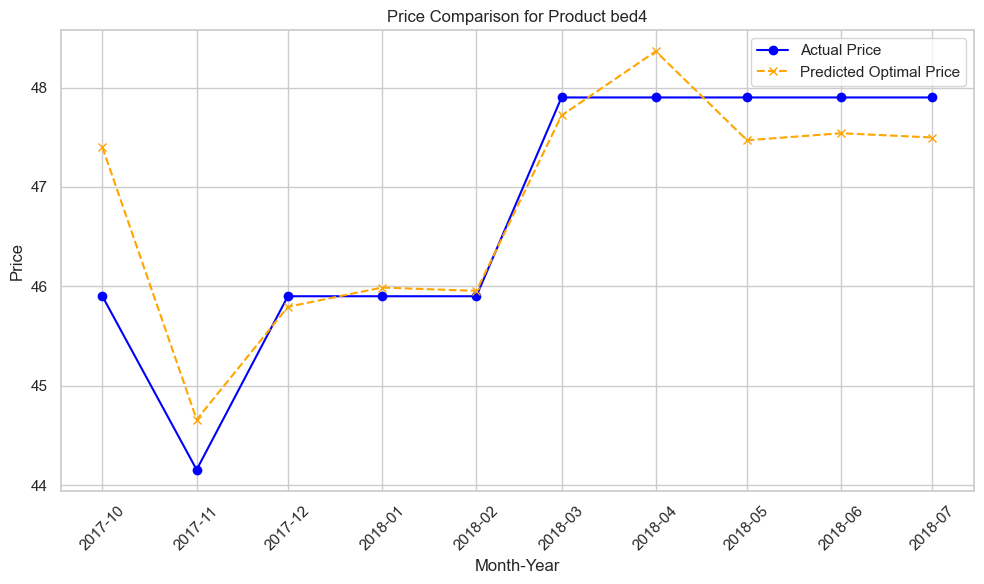

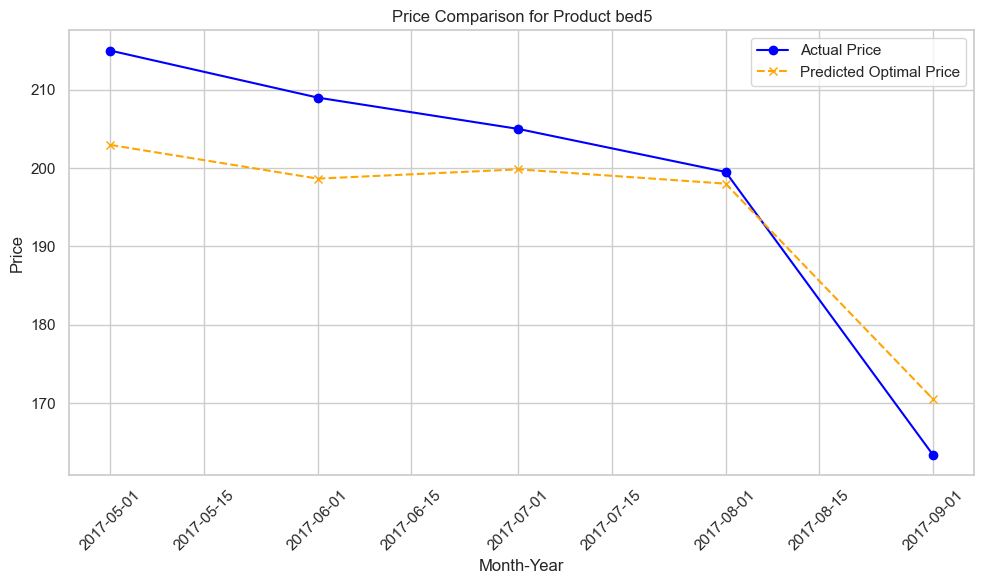

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is called `df` with the columns 'product_id', 'month_year', 'unit_price', and 'predicted_optimal_price'

# Loop through each unique product_id to generate a plot for each product
for product in df['product_id'].unique():
    product_data = df[df['product_id'] == product]
    
    # Sort by 'month_year' to ensure the data is ordered for plotting
    product_data = product_data.sort_values(by='month_year')
    
    # Create a new figure for each product
    plt.figure(figsize=(10, 6))
    
    # Plot the actual unit price and predicted optimal price
    plt.plot(product_data['month_year'], product_data['unit_price'], label='Actual Price', color='blue', marker='o')
    plt.plot(product_data['month_year'], product_data['predicted_optimal_price'], label='Predicted Optimal Price', color='orange', linestyle='--', marker='x')
    
    # Customize the plot with titles and labels
    plt.title(f'Price Comparison for Product {product}')
    plt.xlabel('Month-Year')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [41]:
plt.savefig(f'product_{product}_price_comparison.png')


<Figure size 1000x600 with 0 Axes>

In [43]:
import os
from IPython.display import FileLink

# Define the path to save the CSV file
csv_filename = '/mnt/data/product_price_comparison.csv'

# Save the DataFrame to CSV
df.to_csv(csv_filename, index=False)

# Provide a download link for the saved CSV file
display(FileLink(csv_filename))


C:\mnt\data\product_price_comparison.csv

In [45]:
import os
from IPython.display import FileLink

# Define the correct path to save the CSV file in Jupyter's accessible directory
csv_filename = '/mnt/data/product_price_comparison.csv'

# Save the DataFrame to CSV
df.to_csv(csv_filename, index=False)

# Provide a download link for the saved CSV file
display(FileLink(csv_filename))


C:\mnt\data\product_price_comparison.csv

In [46]:
# Save the DataFrame to a CSV file
df.to_csv('product_price_comparison.csv', index=False)


In [47]:
# Calculate revenue using predicted optimal price
df['predicted_revenue'] = df['qty'] * df['predicted_optimal_price']

# Calculate profit using the predicted revenue and profit margin
df['predicted_profit'] = df['predicted_revenue'] * (df['profit_margin'] / 100)

# Calculate profit percentage using predicted profit and predicted revenue
df['predicted_profit_percentage'] = (df['predicted_profit'] / df['predicted_revenue']) * 100

# Display the updated DataFrame with the new columns
df[['product_id', 'month_year', 'predicted_optimal_price', 'predicted_revenue', 'predicted_profit', 'predicted_profit_percentage']]


product_id month_year  predicted_optimal_price  predicted_revenue  \
0         bed1 2017-05-01                    47.49              32.92   
1         bed1 2017-06-01                    47.95              66.47   
2         bed1 2017-07-01                    47.73              92.87   
3         bed1 2017-08-01                    46.28              74.49   
4         bed1 2017-09-01                    48.46              53.23   
..         ...        ...                      ...                ...   
671       bed5 2017-05-01                   202.95             140.68   
672       bed5 2017-06-01                   198.66             476.35   
673       bed5 2017-07-01                   199.84             818.20   
674       bed5 2017-08-01                   198.01             786.17   
675       bed5 2017-09-01                   170.52             596.21   

     predicted_profit  predicted_profit_percentage  
0               17.31                        52.59  
1               52.97                        79.70  
2               77.46                        83.40  
3               60.10                        80.68  
4               37.31                        70.09  
..                ...                          ...  
671            132.41                        94.12  
672            456.09                        95.75  
673            796.57                        97.36  
674            766.90                        97.55  
675            570.83                        95.74  

[676 rows x 6 columns]

In [48]:
df.to_csv('product_price_comparison.csv', index=False)